In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[16,16,16,16,16,16] #liding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=32
Axis='AccX,AccY,AccZ' # Axis
PathAxis='AccXYZ'

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15914
SourceData's aborting data = 6
window shape is (15914, 128, 3)
(15914, 128, 3)
hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.2109 - val_loss: 0.1267
Epoch 2/50
1s - loss: 0.0849 - val_loss: 0.0561
Epoch 3/50
1s - loss: 0.0439 - val_loss: 0.0357
Epoch 4/50
1s - loss: 0.0318 - val_loss: 0.0287
Epoch 5/50
1s - loss: 0.0268 - val_loss: 0.0251
Epoch 6/50
1s - loss: 0.0239 - val_loss: 0.0227
Epoch 7/50
2s - loss: 0.0219 - val_loss: 0.0210
Epoch 8/50
2s - loss: 0.0204 - val_loss: 0.0197
Epoch 9/50
2s - loss: 0.0192 - val_loss: 0.0187
Epoch 10/50
2s - loss: 0.0183 - val_loss: 0.0179
Epoch 11/50
1s - loss: 0.0175 - val_loss: 0.0172
Epoch 12/50
1s - loss: 0.0169 - val_loss: 0.0166
Epoch 13/50
2s - loss: 0.0163 - val_loss: 0.0160
Epoch 14/50
2s - loss: 0.0158 - val_loss: 0.0155
Epoch 15/50
2s - loss: 0.0153 - val_loss: 0.0151
Epoch 16/50
1s 

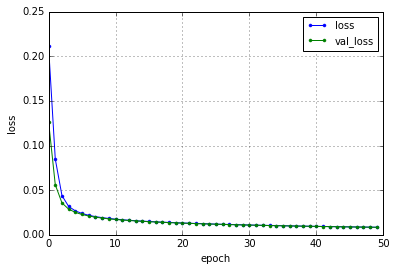

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.3321 - val_loss: 0.0860
Epoch 2/50
2s - loss: 0.0548 - val_loss: 0.0414
Epoch 3/50
1s - loss: 0.0371 - val_loss: 0.0335
Epoch 4/50
1s - loss: 0.0309 - val_loss: 0.0286
Epoch 5/50
1s - loss: 0.0269 - val_loss: 0.0254
Epoch 6/50
2s - loss: 0.0241 - val_loss: 0.0230
Epoch 7/50
2s - loss: 0.0221 - val_loss: 0.0212
Epoch 8/50
2s - loss: 0.0205 - val_loss: 0.0199
Epoch 9/50
2s - loss: 0.0193 - val_loss: 0.0188
Epoch 10/50
2s - loss: 0.0184 - val_loss: 0.0180
Epoch 11/50
2s - loss: 0.0176 - val_loss: 0.0172
Epoch 12/50
1s - loss: 0.0169 - val_loss: 0.0166
Epoch 13/50
1s - loss: 0.0164 - val_loss: 0.0161
Epoch 14/50
2s - loss: 0.0159 - val_loss: 0.0156
Epoch 15/50
2s - loss: 0.0154 - val_loss: 0.0152
Epoch 16/50
2s - loss: 0.0150 - val_loss: 0.0148
Epoch 17/50
2s - loss: 0.0147 - val_loss: 0.0145
Epoch 18/50
2s - loss: 0.0143 - val_loss: 0.0142
Epoch 19/50
2s - loss: 0.0140 - val_loss: 0.0139
Epoch 20/50


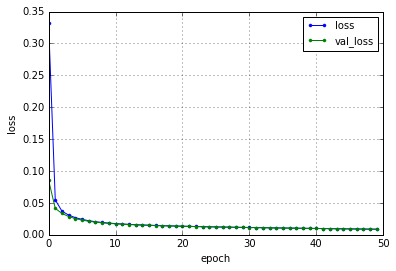

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0899 - val_loss: 0.0728
Epoch 2/50
1s - loss: 0.0648 - val_loss: 0.0580
Epoch 3/50
1s - loss: 0.0520 - val_loss: 0.0462
Epoch 4/50
1s - loss: 0.0407 - val_loss: 0.0355
Epoch 5/50
1s - loss: 0.0310 - val_loss: 0.0270
Epoch 6/50
1s - loss: 0.0238 - val_loss: 0.0210
Epoch 7/50
1s - loss: 0.0189 - val_loss: 0.0171
Epoch 8/50
1s - loss: 0.0158 - val_loss: 0.0146
Epoch 9/50
1s - loss: 0.0138 - val_loss: 0.0131
Epoch 10/50
1s - loss: 0.0125 - val_loss: 0.0120
Epoch 11/50
1s - loss: 0.0116 - val_loss: 0.0112
Epoch 12/50
1s - loss: 0.0110 - val_loss: 0.0107
Epoch 13/50
1s - loss: 0.0105 - val_loss: 0.0102
Epoch 14/50
1s - loss: 0.0100 - val_loss: 0.0099
Epoch 15/50
1s - loss: 0.0097 - val_loss: 0.0095
Epoch 16/50
1s - loss: 0.0094 - val_loss: 0.0093
Epoch 17/50
1s - loss: 0.0091 - val_loss: 0.0090
Epoch 18/50
1s - loss: 0.0089 - val_loss: 0.0088
Epoch 19/50
1s - loss: 0.0087 - val_loss: 0.0086
Epoch 20/50


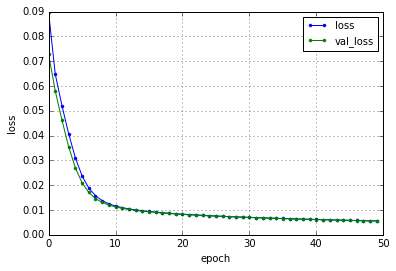

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0335 - val_loss: 0.0095
Epoch 2/50
1s - loss: 0.0064 - val_loss: 0.0052
Epoch 3/50
1s - loss: 0.0044 - val_loss: 0.0035
Epoch 4/50
1s - loss: 0.0035 - val_loss: 0.0029
Epoch 5/50
1s - loss: 0.0029 - val_loss: 0.0024
Epoch 6/50
1s - loss: 0.0027 - val_loss: 0.0045
Epoch 7/50
1s - loss: 0.0023 - val_loss: 0.0025
Epoch 8/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 9/50
1s - loss: 0.0020 - val_loss: 0.0014
Epoch 10/50
1s - loss: 0.0018 - val_loss: 0.0014
Epoch 11/50
2s - loss: 0.0016 - val_loss: 0.0013
Epoch 12/50
2s - loss: 0.0016 - val_loss: 0.0012
Epoch 13/50
1s - loss: 0.0015 - val_loss: 0.0010
Epoch 14/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 15/50
1s - loss: 0.0014 - val_loss: 9.8354e-04
Epoch 16/50
1s - loss: 0.0013 - val_loss: 8.8333e-04
Epoch 17/50
1s - loss: 0.0013 - val_loss: 0.0024
Epoch 18/50
2s - loss: 0.0013 - val_loss: 0.0022
Epoch 19/50
1s - loss: 0.0012 - val_loss: 9.0122e-04


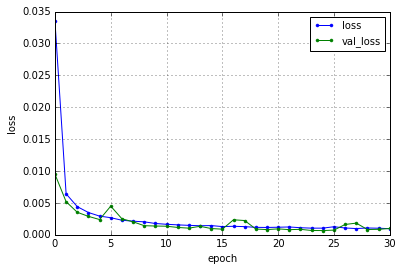

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.0760 - val_loss: 0.0134
Epoch 2/50
2s - loss: 0.0089 - val_loss: 0.0142
Epoch 3/50
2s - loss: 0.0064 - val_loss: 0.0045
Epoch 4/50
2s - loss: 0.0053 - val_loss: 0.0068
Epoch 5/50
2s - loss: 0.0050 - val_loss: 0.0032
Epoch 6/50
2s - loss: 0.0047 - val_loss: 0.0057
Epoch 7/50
2s - loss: 0.0044 - val_loss: 0.0031
Epoch 8/50
1s - loss: 0.0044 - val_loss: 0.0043
Epoch 9/50
1s - loss: 0.0045 - val_loss: 0.0054
Epoch 10/50
1s - loss: 0.0040 - val_loss: 0.0036
Epoch 11/50
2s - loss: 0.0041 - val_loss: 0.0028
Epoch 12/50
1s - loss: 0.0040 - val_loss: 0.0040
Epoch 13/50
1s - loss: 0.0038 - val_loss: 0.0057
Epoch 14/50
1s - loss: 0.0039 - val_loss: 0.0027
Epoch 15/50
2s - loss: 0.0036 - val_loss: 0.0056
Epoch 16/50
2s - loss: 0.0035 - val_loss: 0.0023
Epoch 17/50
2s - loss: 0.0035 - val_loss: 0.0056
Epoch 18/50
2s - loss: 0.0032 - val_loss: 0.0042
Epoch 19/50
2s - loss: 0.0037 - val_loss: 0.0025
Epoch 20/50


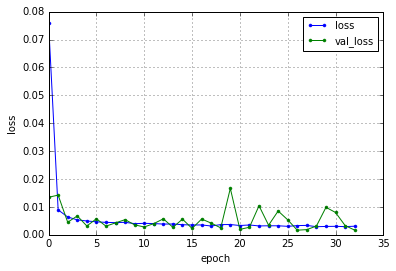

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.0149 - val_loss: 0.0043
Epoch 2/50
2s - loss: 0.0033 - val_loss: 0.0027
Epoch 3/50
2s - loss: 0.0023 - val_loss: 0.0020
Epoch 4/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 5/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 6/50
1s - loss: 0.0015 - val_loss: 0.0015
Epoch 7/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 8/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 9/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 10/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 11/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 12/50
1s - loss: 0.0010 - val_loss: 0.0012
Epoch 13/50
1s - loss: 9.9211e-04 - val_loss: 9.8461e-04
Epoch 14/50
1s - loss: 9.4929e-04 - val_loss: 0.0011
Epoch 15/50
1s - loss: 9.1487e-04 - val_loss: 0.0012
Epoch 16/50
1s - loss: 8.7621e-04 - val_loss: 8.2227e-04
Epoch 17/50
1s - loss: 8.4679e-04 - val_loss: 8.6043e-04
Epoch 18/50
1s - loss: 8.2800e-04 - val_loss: 0.0011
Epoch 19/50
1s - loss: 8.

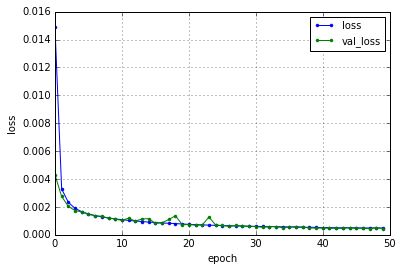

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0198 - val_loss: 0.0063
Epoch 2/50
1s - loss: 0.0046 - val_loss: 0.0034
Epoch 3/50
1s - loss: 0.0029 - val_loss: 0.0022
Epoch 4/50
1s - loss: 0.0020 - val_loss: 0.0019
Epoch 5/50
1s - loss: 0.0013 - val_loss: 9.3827e-04
Epoch 6/50
1s - loss: 8.8711e-04 - val_loss: 6.7567e-04
Epoch 7/50
1s - loss: 7.7121e-04 - val_loss: 5.8202e-04
Epoch 8/50
1s - loss: 5.8086e-04 - val_loss: 4.7295e-04
Epoch 9/50
1s - loss: 4.6048e-04 - val_loss: 4.1777e-04
Epoch 10/50
1s - loss: 4.4479e-04 - val_loss: 3.5175e-04
Epoch 11/50
1s - loss: 4.1798e-04 - val_loss: 3.3956e-04
Epoch 12/50
1s - loss: 3.7549e-04 - val_loss: 3.0377e-04
Epoch 13/50
1s - loss: 3.5612e-04 - val_loss: 3.9223e-04
Epoch 14/50
1s - loss: 3.0445e-04 - val_loss: 2.3157e-04
Epoch 15/50
1s - loss: 3.6976e-04 - val_loss: 2.2086e-04
Epoch 16/50
1s - loss: 2.7590e-04 - val_loss: 3.9295e-04
Epoch 17/50
1s - loss: 2.7562e-04 - val_loss: 2.4793e-04
Epoch 18/5

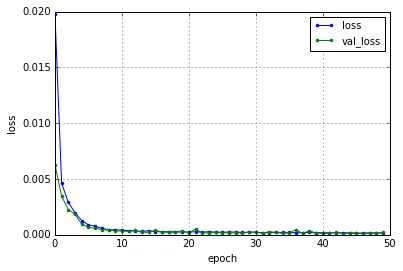

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0380 - val_loss: 0.0112
Epoch 2/50
1s - loss: 0.0083 - val_loss: 0.0057
Epoch 3/50
2s - loss: 0.0048 - val_loss: 0.0048
Epoch 4/50
2s - loss: 0.0033 - val_loss: 0.0028
Epoch 5/50
2s - loss: 0.0025 - val_loss: 0.0036
Epoch 6/50
2s - loss: 0.0018 - val_loss: 0.0014
Epoch 7/50
1s - loss: 0.0014 - val_loss: 0.0011
Epoch 8/50
1s - loss: 0.0011 - val_loss: 7.7236e-04
Epoch 9/50
1s - loss: 8.2815e-04 - val_loss: 0.0012
Epoch 10/50
1s - loss: 7.3058e-04 - val_loss: 7.6149e-04
Epoch 11/50
1s - loss: 6.3095e-04 - val_loss: 5.1051e-04
Epoch 12/50
1s - loss: 5.8018e-04 - val_loss: 4.2659e-04
Epoch 13/50
1s - loss: 4.9378e-04 - val_loss: 3.3422e-04
Epoch 14/50
1s - loss: 5.5578e-04 - val_loss: 0.0012
Epoch 15/50
1s - loss: 4.5973e-04 - val_loss: 7.2195e-04
Epoch 16/50
2s - loss: 4.5553e-04 - val_loss: 3.0880e-04
Epoch 17/50
2s - loss: 4.3069e-04 - val_loss: 2.9254e-04
Epoch 18/50
2s - loss: 4.4768e-04 - val_lo

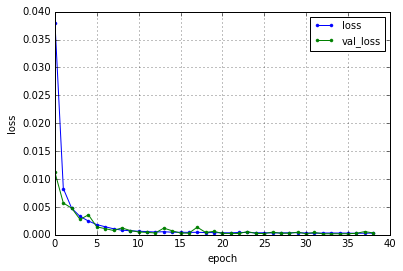

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
2s - loss: 0.0086 - val_loss: 0.0030
Epoch 2/50
2s - loss: 0.0021 - val_loss: 0.0016
Epoch 3/50
1s - loss: 0.0014 - val_loss: 0.0012
Epoch 4/50
1s - loss: 0.0011 - val_loss: 9.3802e-04
Epoch 5/50
1s - loss: 8.9188e-04 - val_loss: 7.5753e-04
Epoch 6/50
1s - loss: 7.3748e-04 - val_loss: 6.2176e-04
Epoch 7/50
1s - loss: 6.1442e-04 - val_loss: 5.9379e-04
Epoch 8/50
1s - loss: 5.1419e-04 - val_loss: 6.6069e-04
Epoch 9/50
1s - loss: 4.6341e-04 - val_loss: 3.9058e-04
Epoch 10/50
1s - loss: 4.1027e-04 - val_loss: 4.3556e-04
Epoch 11/50
1s - loss: 3.6830e-04 - val_loss: 3.2863e-04
Epoch 12/50
1s - loss: 3.3435e-04 - val_loss: 4.0572e-04
Epoch 13/50
1s - loss: 3.1831e-04 - val_loss: 3.6159e-04
Epoch 14/50
1s - loss: 2.7673e-04 - val_loss: 2.9209e-04
Epoch 15/50
1s - loss: 2.6015e-04 - val_loss: 3.0150e-04
Epoch 16/50
1s - loss: 2.5984e-04 - val_loss: 2.2069e-04
Epoch 17/50
1s - loss: 2.3593e-04 - val_loss: 3.8553e-04
Ep

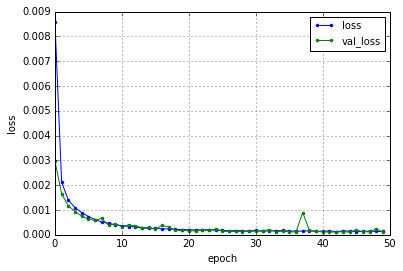

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0226 - val_loss: 0.0049
Epoch 2/50
1s - loss: 0.0035 - val_loss: 0.0030
Epoch 3/50
1s - loss: 0.0021 - val_loss: 0.0015
Epoch 4/50
1s - loss: 0.0014 - val_loss: 0.0012
Epoch 5/50
1s - loss: 0.0011 - val_loss: 7.5514e-04
Epoch 6/50
1s - loss: 7.9730e-04 - val_loss: 6.1681e-04
Epoch 7/50
1s - loss: 6.9748e-04 - val_loss: 5.0329e-04
Epoch 8/50
1s - loss: 6.0191e-04 - val_loss: 5.5248e-04
Epoch 9/50
0s - loss: 6.0014e-04 - val_loss: 4.7851e-04
Epoch 10/50
0s - loss: 5.7386e-04 - val_loss: 4.4177e-04
Epoch 11/50
0s - loss: 4.6086e-04 - val_loss: 3.0974e-04
Epoch 12/50
0s - loss: 4.1585e-04 - val_loss: 2.7332e-04
Epoch 13/50
0s - loss: 3.8335e-04 - val_loss: 2.7468e-04
Epoch 14/50
1s - loss: 3.4844e-04 - val_loss: 2.4382e-04
Epoch 15/50
1s - loss: 3.5999e-04 - val_loss: 2.9738e-04
Epoch 16/50
1s - loss: 3.9886e-04 - val_loss: 9.3318e-04
Epoch 17/50
1s - loss: 3.0603e-04 - val_loss: 3.1402e-04
Epoch 18/5

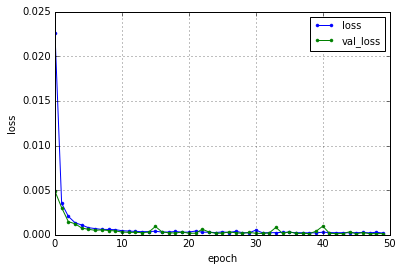

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0460 - val_loss: 0.0075
Epoch 2/50
0s - loss: 0.0051 - val_loss: 0.0049
Epoch 3/50
1s - loss: 0.0033 - val_loss: 0.0026
Epoch 4/50
0s - loss: 0.0024 - val_loss: 0.0019
Epoch 5/50
1s - loss: 0.0020 - val_loss: 0.0015
Epoch 6/50
0s - loss: 0.0016 - val_loss: 0.0017
Epoch 7/50
0s - loss: 0.0014 - val_loss: 9.7067e-04
Epoch 8/50
0s - loss: 0.0011 - val_loss: 0.0017
Epoch 9/50
1s - loss: 0.0010 - val_loss: 0.0018
Epoch 10/50
1s - loss: 9.0156e-04 - val_loss: 5.9461e-04
Epoch 11/50
1s - loss: 7.0767e-04 - val_loss: 6.3491e-04
Epoch 12/50
1s - loss: 7.1665e-04 - val_loss: 4.3856e-04
Epoch 13/50
0s - loss: 5.8590e-04 - val_loss: 4.6403e-04
Epoch 14/50
1s - loss: 5.9941e-04 - val_loss: 0.0015
Epoch 15/50
0s - loss: 5.7785e-04 - val_loss: 4.6923e-04
Epoch 16/50
0s - loss: 5.6079e-04 - val_loss: 5.9208e-04
Epoch 17/50
0s - loss: 5.4751e-04 - val_loss: 5.0318e-04
Epoch 18/50
0s - loss: 4.9465e-04 - val_loss: 

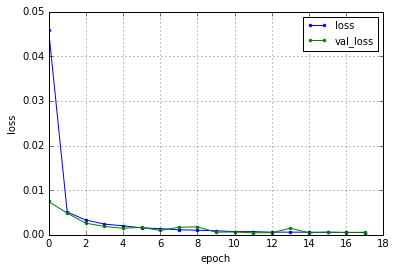

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0072 - val_loss: 0.0016
Epoch 2/50
0s - loss: 0.0013 - val_loss: 0.0010
Epoch 3/50
0s - loss: 9.3418e-04 - val_loss: 0.0011
Epoch 4/50
0s - loss: 7.6311e-04 - val_loss: 6.0364e-04
Epoch 5/50
0s - loss: 5.7969e-04 - val_loss: 8.4011e-04
Epoch 6/50
0s - loss: 5.2234e-04 - val_loss: 6.2452e-04
Epoch 7/50
0s - loss: 4.3875e-04 - val_loss: 3.4920e-04
Epoch 8/50
0s - loss: 4.5886e-04 - val_loss: 3.1242e-04
Epoch 9/50
0s - loss: 4.0270e-04 - val_loss: 2.7937e-04
Epoch 10/50
0s - loss: 3.4535e-04 - val_loss: 2.5340e-04
Epoch 11/50
0s - loss: 2.7924e-04 - val_loss: 2.2998e-04
Epoch 12/50
0s - loss: 2.8929e-04 - val_loss: 2.1303e-04
Epoch 13/50
0s - loss: 3.0230e-04 - val_loss: 3.6842e-04
Epoch 14/50
0s - loss: 2.8642e-04 - val_loss: 0.0018
Epoch 15/50
0s - loss: 2.7145e-04 - val_loss: 2.6410e-04
Epoch 16/50
0s - loss: 2.8618e-04 - val_loss: 4.0687e-04
Epoch 17/50
0s - loss: 2.7139e-04 - val_loss: 4.5913e-0

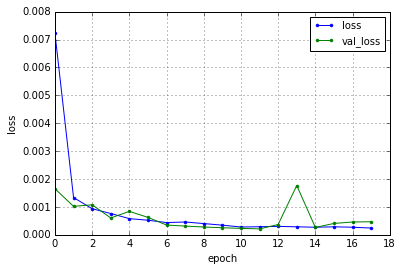

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0128 - val_loss: 0.0053
Epoch 2/50
0s - loss: 0.0045 - val_loss: 0.0036
Epoch 3/50
0s - loss: 0.0033 - val_loss: 0.0027
Epoch 4/50
0s - loss: 0.0026 - val_loss: 0.0022
Epoch 5/50
0s - loss: 0.0022 - val_loss: 0.0019
Epoch 6/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 7/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 8/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 9/50
0s - loss: 0.0014 - val_loss: 0.0012
Epoch 10/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 11/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 12/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 13/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 14/50
0s - loss: 9.9938e-04 - val_loss: 9.8592e-04
Epoch 15/50
0s - loss: 9.2800e-04 - val_loss: 8.5077e-04
Epoch 16/50
0s - loss: 8.9379e-04 - val_loss: 8.6714e-04
Epoch 17/50
0s - loss: 8.6069e-04 - val_loss: 7.9072e-04
Epoch 18/50
0s - loss: 8.1356e-04 - val_loss: 7.4219e-04
Epoch 19/50
0s - loss

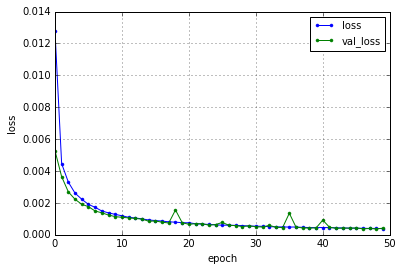

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0209 - val_loss: 0.0107
Epoch 2/50
0s - loss: 0.0068 - val_loss: 0.0077
Epoch 3/50
0s - loss: 0.0052 - val_loss: 0.0043
Epoch 4/50
0s - loss: 0.0042 - val_loss: 0.0047
Epoch 5/50
0s - loss: 0.0038 - val_loss: 0.0039
Epoch 6/50
0s - loss: 0.0033 - val_loss: 0.0078
Epoch 7/50
0s - loss: 0.0030 - val_loss: 0.0027
Epoch 8/50
0s - loss: 0.0028 - val_loss: 0.0027
Epoch 9/50
0s - loss: 0.0025 - val_loss: 0.0025
Epoch 10/50
0s - loss: 0.0024 - val_loss: 0.0025
Epoch 11/50
0s - loss: 0.0023 - val_loss: 0.0020
Epoch 12/50
0s - loss: 0.0021 - val_loss: 0.0018
Epoch 13/50
0s - loss: 0.0020 - val_loss: 0.0025
Epoch 14/50
0s - loss: 0.0019 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0018 - val_loss: 0.0023
Epoch 16/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 17/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 18/50
0s - loss: 0.0016 - val_loss: 0.0017
Epoch 19/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 20/50


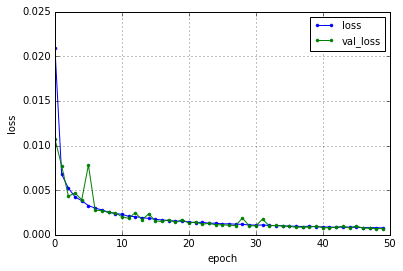

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0043 - val_loss: 0.0019
Epoch 2/50
0s - loss: 0.0016 - val_loss: 0.0014
Epoch 3/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 4/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 5/50
0s - loss: 9.9195e-04 - val_loss: 9.5536e-04
Epoch 6/50
0s - loss: 9.0807e-04 - val_loss: 8.5364e-04
Epoch 7/50
0s - loss: 8.3651e-04 - val_loss: 8.0146e-04
Epoch 8/50
0s - loss: 7.7604e-04 - val_loss: 0.0015
Epoch 9/50
0s - loss: 7.3580e-04 - val_loss: 7.0248e-04
Epoch 10/50
0s - loss: 6.8521e-04 - val_loss: 7.0289e-04
Epoch 11/50
0s - loss: 6.5134e-04 - val_loss: 6.5557e-04
Epoch 12/50
0s - loss: 6.2413e-04 - val_loss: 5.9749e-04
Epoch 13/50
0s - loss: 5.9733e-04 - val_loss: 5.7441e-04
Epoch 14/50
0s - loss: 5.7339e-04 - val_loss: 5.8051e-04
Epoch 15/50
0s - loss: 5.4820e-04 - val_loss: 5.2818e-04
Epoch 16/50
0s - loss: 5.3013e-04 - val_loss: 5.0794e-04
Epoch 17/50
0s - loss: 5.1274e-04 - val_loss: 5.2507e-04
Epoch 18/5

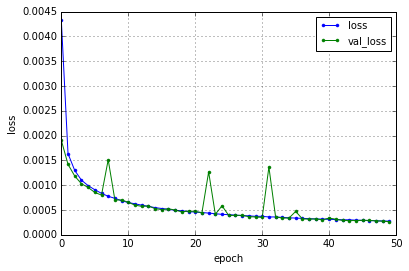

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0153 - val_loss: 0.0038
Epoch 2/50
0s - loss: 0.0047 - val_loss: 0.0024
Epoch 3/50
0s - loss: 0.0038 - val_loss: 0.0018
Epoch 4/50
0s - loss: 0.0034 - val_loss: 0.0049
Epoch 5/50
0s - loss: 0.0033 - val_loss: 0.0030
Epoch 6/50
0s - loss: 0.0031 - val_loss: 0.0023
Epoch 7/50
0s - loss: 0.0030 - val_loss: 0.0023
Epoch 8/50
0s - loss: 0.0029 - val_loss: 0.0050
Epoch 9/50
0s - loss: 0.0029 - val_loss: 0.0013
Epoch 10/50
0s - loss: 0.0028 - val_loss: 0.0082
Epoch 11/50
0s - loss: 0.0027 - val_loss: 0.0019
Epoch 12/50
0s - loss: 0.0027 - val_loss: 0.0011
Epoch 13/50
0s - loss: 0.0026 - val_loss: 0.0045
Epoch 14/50
0s - loss: 0.0026 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 16/50
0s - loss: 0.0025 - val_loss: 0.0022
Epoch 17/50
0s - loss: 0.0025 - val_loss: 0.0037
Epoch 18/50
0s - loss: 0.0024 - val_loss: 0.0066


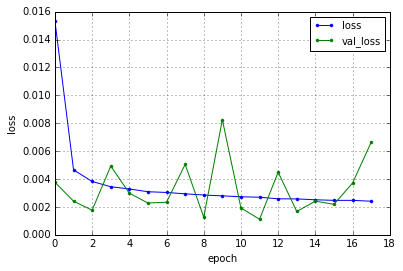

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0370 - val_loss: 0.0069
Epoch 2/50
0s - loss: 0.0098 - val_loss: 0.0088
Epoch 3/50
0s - loss: 0.0088 - val_loss: 0.0060
Epoch 4/50
0s - loss: 0.0084 - val_loss: 0.0106
Epoch 5/50
0s - loss: 0.0081 - val_loss: 0.0050
Epoch 6/50
0s - loss: 0.0078 - val_loss: 0.0076
Epoch 7/50
0s - loss: 0.0076 - val_loss: 0.0366
Epoch 8/50
0s - loss: 0.0075 - val_loss: 0.0032
Epoch 9/50
0s - loss: 0.0073 - val_loss: 0.0075
Epoch 10/50
0s - loss: 0.0071 - val_loss: 0.0069
Epoch 11/50
0s - loss: 0.0070 - val_loss: 0.0041
Epoch 12/50
0s - loss: 0.0069 - val_loss: 0.0043
Epoch 13/50
0s - loss: 0.0068 - val_loss: 0.0061
Epoch 14/50
0s - loss: 0.0067 - val_loss: 0.0042


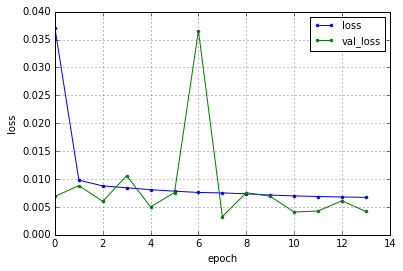

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0056 - val_loss: 0.0017
Epoch 2/50
0s - loss: 0.0017 - val_loss: 0.0028
Epoch 3/50
0s - loss: 0.0015 - val_loss: 0.0010
Epoch 4/50
0s - loss: 0.0014 - val_loss: 0.0016
Epoch 5/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 6/50
0s - loss: 0.0012 - val_loss: 0.0010
Epoch 7/50
0s - loss: 0.0012 - val_loss: 0.0018
Epoch 8/50
0s - loss: 0.0011 - val_loss: 6.8121e-04
Epoch 9/50
0s - loss: 0.0011 - val_loss: 6.6346e-04
Epoch 10/50
0s - loss: 0.0011 - val_loss: 5.2847e-04
Epoch 11/50
0s - loss: 0.0011 - val_loss: 6.3143e-04
Epoch 12/50
0s - loss: 0.0010 - val_loss: 9.5310e-04
Epoch 13/50
0s - loss: 0.0011 - val_loss: 7.2956e-04
Epoch 14/50
0s - loss: 0.0011 - val_loss: 9.6400e-04
Epoch 15/50
0s - loss: 0.0010 - val_loss: 5.4287e-04
Epoch 16/50
0s - loss: 0.0010 - val_loss: 6.8143e-04


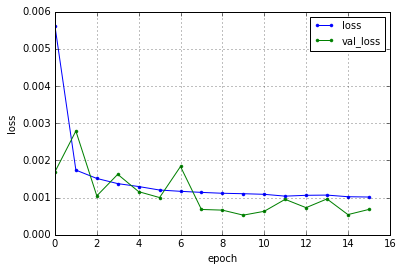

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
1s - loss: 0.0160 - val_loss: 0.0088
Epoch 2/50
0s - loss: 0.0046 - val_loss: 0.0026
Epoch 3/50
0s - loss: 0.0036 - val_loss: 0.0078
Epoch 4/50
0s - loss: 0.0030 - val_loss: 0.0023
Epoch 5/50
0s - loss: 0.0026 - val_loss: 0.0015
Epoch 6/50
0s - loss: 0.0022 - val_loss: 0.0016
Epoch 7/50
0s - loss: 0.0021 - val_loss: 0.0011
Epoch 8/50
0s - loss: 0.0020 - val_loss: 0.0015
Epoch 9/50
0s - loss: 0.0018 - val_loss: 0.0012
Epoch 10/50
0s - loss: 0.0015 - val_loss: 0.0012
Epoch 11/50
0s - loss: 0.0015 - val_loss: 6.9840e-04
Epoch 12/50
0s - loss: 0.0014 - val_loss: 7.3268e-04
Epoch 13/50
0s - loss: 0.0013 - val_loss: 5.7751e-04
Epoch 14/50
0s - loss: 0.0014 - val_loss: 0.0010
Epoch 15/50
0s - loss: 0.0012 - val_loss: 7.9152e-04
Epoch 16/50
0s - loss: 0.0012 - val_loss: 5.0303e-04
Epoch 17/50
0s - loss: 0.0012 - val_loss: 7.2363e-04
Epoch 18/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 19/50
0s - loss: 0.0011 - val_l

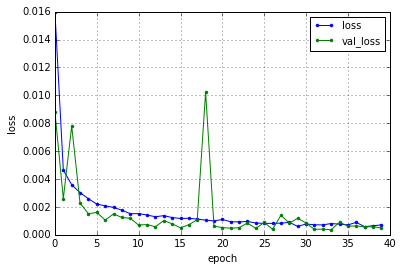

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0347 - val_loss: 0.0081
Epoch 2/50
0s - loss: 0.0105 - val_loss: 0.0092
Epoch 3/50
0s - loss: 0.0090 - val_loss: 0.0056
Epoch 4/50
0s - loss: 0.0077 - val_loss: 0.0083
Epoch 5/50
0s - loss: 0.0069 - val_loss: 0.0040
Epoch 6/50
0s - loss: 0.0062 - val_loss: 0.0029
Epoch 7/50
0s - loss: 0.0057 - val_loss: 0.0025
Epoch 8/50
0s - loss: 0.0049 - val_loss: 0.0064
Epoch 9/50
0s - loss: 0.0046 - val_loss: 0.0037
Epoch 10/50
0s - loss: 0.0041 - val_loss: 0.0029
Epoch 11/50
0s - loss: 0.0038 - val_loss: 0.0022
Epoch 12/50
0s - loss: 0.0033 - val_loss: 0.0027
Epoch 13/50
0s - loss: 0.0033 - val_loss: 0.0071
Epoch 14/50
0s - loss: 0.0030 - val_loss: 0.0027
Epoch 15/50
0s - loss: 0.0028 - val_loss: 0.0099
Epoch 16/50
0s - loss: 0.0025 - val_loss: 0.0123
Epoch 17/50
0s - loss: 0.0023 - val_loss: 0.0260


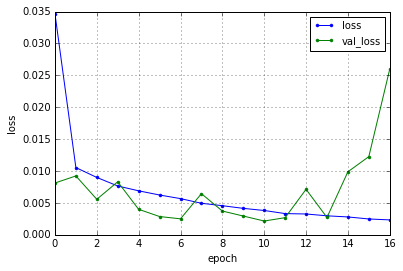

hiden node = 32
Train on 15914 samples, validate on 15914 samples
Epoch 1/50
0s - loss: 0.0060 - val_loss: 0.0016
Epoch 2/50
0s - loss: 0.0018 - val_loss: 0.0012
Epoch 3/50
0s - loss: 0.0015 - val_loss: 7.8337e-04
Epoch 4/50
0s - loss: 0.0012 - val_loss: 6.6334e-04
Epoch 5/50
0s - loss: 0.0011 - val_loss: 8.2735e-04
Epoch 6/50
0s - loss: 0.0010 - val_loss: 0.0029
Epoch 7/50
0s - loss: 0.0010 - val_loss: 0.0013
Epoch 8/50
0s - loss: 7.7670e-04 - val_loss: 0.0040
Epoch 9/50
1s - loss: 8.1833e-04 - val_loss: 5.3908e-04
Epoch 10/50
1s - loss: 7.4185e-04 - val_loss: 4.1014e-04
Epoch 11/50
1s - loss: 7.3970e-04 - val_loss: 0.0017
Epoch 12/50
1s - loss: 6.2575e-04 - val_loss: 5.1135e-04
Epoch 13/50
1s - loss: 6.6990e-04 - val_loss: 3.6405e-04
Epoch 14/50
1s - loss: 6.3518e-04 - val_loss: 3.1039e-04
Epoch 15/50
1s - loss: 5.7267e-04 - val_loss: 0.0011
Epoch 16/50
1s - loss: 5.2403e-04 - val_loss: 0.0469
Epoch 17/50
1s - loss: 6.9917e-04 - val_loss: 2.8820e-04
Epoch 18/50
1s - loss: 4.5945e-04 

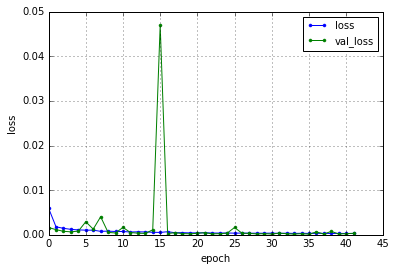

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15906
SourceData's aborting data = 6
window shape is (15906, 256, 3)
(15906, 256, 3)
hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.2618 - val_loss: 0.2013
Epoch 2/50
0s - loss: 0.1550 - val_loss: 0.1148
Epoch 3/50
0s - loss: 0.0894 - val_loss: 0.0699
Epoch 4/50
0s - loss: 0.0590 - val_loss: 0.0507
Epoch 5/50
0s - loss: 0.0458 - val_loss: 0.0418
Epoch 6/50
0s - loss: 0.0391 - val_loss: 0.0368
Epoch 7/50
0s - loss: 0.0351 - val_loss: 0.0336
Epoch 8/50
0s - loss: 0.0324 - val_loss: 0.0313
Epoch 9/50
0s - loss: 0.0304 - val_loss: 0.0296
Epoch 10/50
0s - loss: 0.0290 - val_loss: 0.0283
Epoch 11/50
0s - loss: 0.0278 - val_loss: 0.0273
Epoch 12/50
0s - loss: 0.0269 - val_loss: 0.0264
Epoch 13/50
0s - loss: 0.0261 - val_loss: 0.0257
Epoch 14/50
0s - loss: 0.0254 - val_loss: 0.0251
Epoch 15/50
0s - loss: 0.0248 - val_loss: 0.0245
Epoch 16/50
0s 

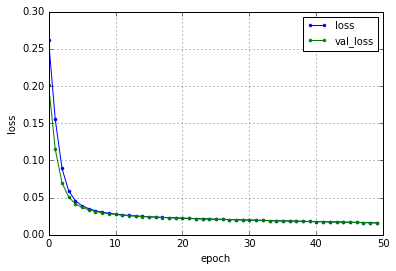

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.4411 - val_loss: 0.2017
Epoch 2/50
0s - loss: 0.1195 - val_loss: 0.0743
Epoch 3/50
0s - loss: 0.0603 - val_loss: 0.0513
Epoch 4/50
0s - loss: 0.0466 - val_loss: 0.0429
Epoch 5/50
0s - loss: 0.0405 - val_loss: 0.0384
Epoch 6/50
0s - loss: 0.0368 - val_loss: 0.0355
Epoch 7/50
0s - loss: 0.0344 - val_loss: 0.0334
Epoch 8/50
0s - loss: 0.0326 - val_loss: 0.0318
Epoch 9/50
0s - loss: 0.0312 - val_loss: 0.0306
Epoch 10/50
0s - loss: 0.0300 - val_loss: 0.0295
Epoch 11/50
0s - loss: 0.0290 - val_loss: 0.0286
Epoch 12/50
0s - loss: 0.0282 - val_loss: 0.0279
Epoch 13/50
0s - loss: 0.0275 - val_loss: 0.0272
Epoch 14/50
0s - loss: 0.0269 - val_loss: 0.0266
Epoch 15/50
1s - loss: 0.0263 - val_loss: 0.0261
Epoch 16/50
0s - loss: 0.0258 - val_loss: 0.0256
Epoch 17/50
0s - loss: 0.0254 - val_loss: 0.0252
Epoch 18/50
0s - loss: 0.0250 - val_loss: 0.0248
Epoch 19/50
1s - loss: 0.0246 - val_loss: 0.0244
Epoch 20/50


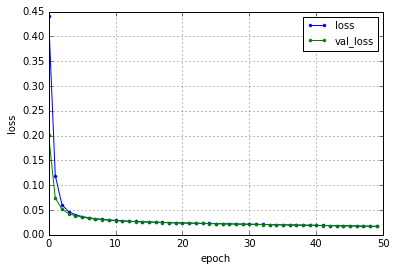

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0868 - val_loss: 0.0775
Epoch 2/50
0s - loss: 0.0723 - val_loss: 0.0676
Epoch 3/50
1s - loss: 0.0632 - val_loss: 0.0587
Epoch 4/50
0s - loss: 0.0544 - val_loss: 0.0500
Epoch 5/50
0s - loss: 0.0460 - val_loss: 0.0420
Epoch 6/50
0s - loss: 0.0385 - val_loss: 0.0353
Epoch 7/50
0s - loss: 0.0325 - val_loss: 0.0299
Epoch 8/50
0s - loss: 0.0278 - val_loss: 0.0259
Epoch 9/50
0s - loss: 0.0244 - val_loss: 0.0230
Epoch 10/50
0s - loss: 0.0219 - val_loss: 0.0209
Epoch 11/50
1s - loss: 0.0201 - val_loss: 0.0194
Epoch 12/50
1s - loss: 0.0188 - val_loss: 0.0182
Epoch 13/50
0s - loss: 0.0177 - val_loss: 0.0173
Epoch 14/50
0s - loss: 0.0170 - val_loss: 0.0166
Epoch 15/50
0s - loss: 0.0163 - val_loss: 0.0160
Epoch 16/50
0s - loss: 0.0158 - val_loss: 0.0156
Epoch 17/50
0s - loss: 0.0154 - val_loss: 0.0152
Epoch 18/50
0s - loss: 0.0150 - val_loss: 0.0148
Epoch 19/50
0s - loss: 0.0146 - val_loss: 0.0145
Epoch 20/50


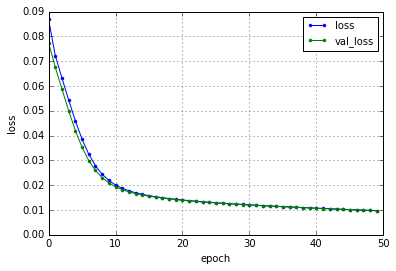

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0426 - val_loss: 0.0151
Epoch 2/50
0s - loss: 0.0117 - val_loss: 0.0133
Epoch 3/50
0s - loss: 0.0087 - val_loss: 0.0085
Epoch 4/50
0s - loss: 0.0074 - val_loss: 0.0229
Epoch 5/50
0s - loss: 0.0065 - val_loss: 0.0054
Epoch 6/50
0s - loss: 0.0059 - val_loss: 0.0195
Epoch 7/50
0s - loss: 0.0054 - val_loss: 0.0270
Epoch 8/50
0s - loss: 0.0052 - val_loss: 0.0042
Epoch 9/50
0s - loss: 0.0049 - val_loss: 0.0039
Epoch 10/50
0s - loss: 0.0048 - val_loss: 0.0062
Epoch 11/50
0s - loss: 0.0044 - val_loss: 0.0086
Epoch 12/50
0s - loss: 0.0043 - val_loss: 0.0049
Epoch 13/50
0s - loss: 0.0041 - val_loss: 0.0042
Epoch 14/50
0s - loss: 0.0039 - val_loss: 0.0030
Epoch 15/50
0s - loss: 0.0039 - val_loss: 0.0035
Epoch 16/50
0s - loss: 0.0039 - val_loss: 0.0065
Epoch 17/50
0s - loss: 0.0034 - val_loss: 0.0030
Epoch 18/50
0s - loss: 0.0035 - val_loss: 0.0040
Epoch 19/50
0s - loss: 0.0034 - val_loss: 0.0197
Epoch 20/50


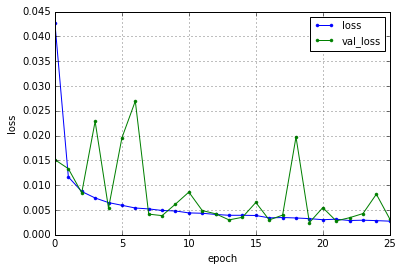

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0741 - val_loss: 0.0320
Epoch 2/50
0s - loss: 0.0170 - val_loss: 0.0189
Epoch 3/50
0s - loss: 0.0128 - val_loss: 0.0232
Epoch 4/50
0s - loss: 0.0106 - val_loss: 0.0075
Epoch 5/50
0s - loss: 0.0097 - val_loss: 0.0093
Epoch 6/50
0s - loss: 0.0097 - val_loss: 0.0113
Epoch 7/50
0s - loss: 0.0089 - val_loss: 0.0127
Epoch 8/50
0s - loss: 0.0083 - val_loss: 0.0057
Epoch 9/50
0s - loss: 0.0078 - val_loss: 0.0164
Epoch 10/50
0s - loss: 0.0076 - val_loss: 0.0060
Epoch 11/50
0s - loss: 0.0075 - val_loss: 0.0057
Epoch 12/50
0s - loss: 0.0074 - val_loss: 0.0104
Epoch 13/50
0s - loss: 0.0073 - val_loss: 0.0075
Epoch 14/50
0s - loss: 0.0073 - val_loss: 0.0105
Epoch 15/50
0s - loss: 0.0071 - val_loss: 0.0151
Epoch 16/50
0s - loss: 0.0069 - val_loss: 0.0116
Epoch 17/50
0s - loss: 0.0068 - val_loss: 0.0047
Epoch 18/50
0s - loss: 0.0066 - val_loss: 0.0052
Epoch 19/50
0s - loss: 0.0070 - val_loss: 0.0106
Epoch 20/50


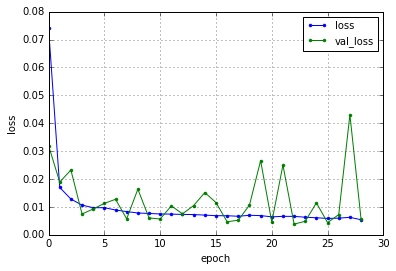

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0181 - val_loss: 0.0072
Epoch 2/50
0s - loss: 0.0056 - val_loss: 0.0045
Epoch 3/50
0s - loss: 0.0040 - val_loss: 0.0036
Epoch 4/50
0s - loss: 0.0033 - val_loss: 0.0030
Epoch 5/50
0s - loss: 0.0029 - val_loss: 0.0027
Epoch 6/50
0s - loss: 0.0026 - val_loss: 0.0025
Epoch 7/50
0s - loss: 0.0024 - val_loss: 0.0028
Epoch 8/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 9/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 10/50
0s - loss: 0.0020 - val_loss: 0.0018
Epoch 11/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 12/50
0s - loss: 0.0018 - val_loss: 0.0062
Epoch 13/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 14/50
0s - loss: 0.0017 - val_loss: 0.0020
Epoch 15/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 16/50
0s - loss: 0.0016 - val_loss: 0.0028
Epoch 17/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 18/50
0s - loss: 0.0015 - val_loss: 0.0016
Epoch 19/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 20/50


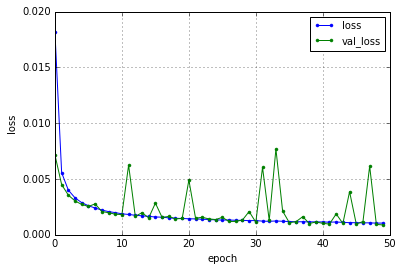

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0239 - val_loss: 0.0103
Epoch 2/50
0s - loss: 0.0078 - val_loss: 0.0060
Epoch 3/50
0s - loss: 0.0050 - val_loss: 0.0041
Epoch 4/50
0s - loss: 0.0035 - val_loss: 0.0028
Epoch 5/50
0s - loss: 0.0025 - val_loss: 0.0018
Epoch 6/50
0s - loss: 0.0017 - val_loss: 0.0014
Epoch 7/50
0s - loss: 0.0013 - val_loss: 0.0010
Epoch 8/50
0s - loss: 0.0010 - val_loss: 0.0030
Epoch 9/50
0s - loss: 8.7559e-04 - val_loss: 6.6664e-04
Epoch 10/50
0s - loss: 7.3586e-04 - val_loss: 5.8640e-04
Epoch 11/50
0s - loss: 6.9363e-04 - val_loss: 6.1244e-04
Epoch 12/50
0s - loss: 7.4927e-04 - val_loss: 5.9702e-04
Epoch 13/50
0s - loss: 5.8426e-04 - val_loss: 4.6293e-04
Epoch 14/50
0s - loss: 6.2965e-04 - val_loss: 5.7610e-04
Epoch 15/50
0s - loss: 5.4871e-04 - val_loss: 7.8406e-04
Epoch 16/50
0s - loss: 6.0906e-04 - val_loss: 5.9949e-04
Epoch 17/50
0s - loss: 4.5380e-04 - val_loss: 5.1449e-04
Epoch 18/50
0s - loss: 4.6227e-04 - va

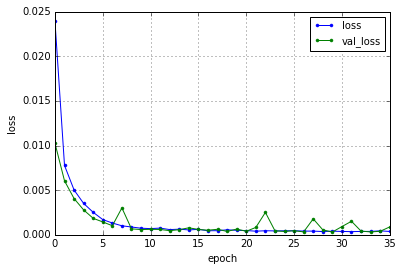

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0431 - val_loss: 0.0156
Epoch 2/50
0s - loss: 0.0105 - val_loss: 0.0073
Epoch 3/50
0s - loss: 0.0063 - val_loss: 0.0051
Epoch 4/50
0s - loss: 0.0044 - val_loss: 0.0036
Epoch 5/50
0s - loss: 0.0034 - val_loss: 0.0027
Epoch 6/50
0s - loss: 0.0026 - val_loss: 0.0024
Epoch 7/50
0s - loss: 0.0022 - val_loss: 0.0078
Epoch 8/50
0s - loss: 0.0018 - val_loss: 0.0014
Epoch 9/50
0s - loss: 0.0016 - val_loss: 0.0013
Epoch 10/50
0s - loss: 0.0013 - val_loss: 0.0014
Epoch 11/50
0s - loss: 0.0012 - val_loss: 9.0046e-04
Epoch 12/50
0s - loss: 0.0011 - val_loss: 7.8800e-04
Epoch 13/50
0s - loss: 0.0010 - val_loss: 0.0031
Epoch 14/50
0s - loss: 9.4218e-04 - val_loss: 0.0030
Epoch 15/50
0s - loss: 9.1838e-04 - val_loss: 8.5084e-04
Epoch 16/50
0s - loss: 8.2222e-04 - val_loss: 6.1631e-04
Epoch 17/50
0s - loss: 8.3398e-04 - val_loss: 0.0023
Epoch 18/50
0s - loss: 8.3627e-04 - val_loss: 0.0049
Epoch 19/50
0s - loss: 7.

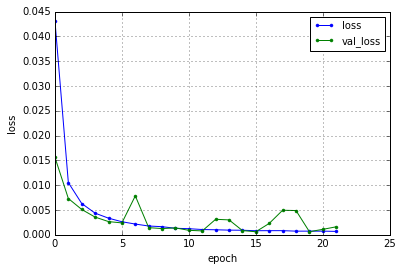

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0090 - val_loss: 0.0034
Epoch 2/50
0s - loss: 0.0028 - val_loss: 0.0022
Epoch 3/50
0s - loss: 0.0020 - val_loss: 0.0016
Epoch 4/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 5/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 6/50
0s - loss: 0.0011 - val_loss: 0.0012
Epoch 7/50
0s - loss: 9.0941e-04 - val_loss: 7.9626e-04
Epoch 8/50
0s - loss: 8.2808e-04 - val_loss: 7.3145e-04
Epoch 9/50
0s - loss: 7.3151e-04 - val_loss: 6.9927e-04
Epoch 10/50
0s - loss: 6.8441e-04 - val_loss: 5.8452e-04
Epoch 11/50
0s - loss: 6.3588e-04 - val_loss: 7.7436e-04
Epoch 12/50
0s - loss: 6.0437e-04 - val_loss: 5.8474e-04
Epoch 13/50
0s - loss: 6.0359e-04 - val_loss: 4.9834e-04
Epoch 14/50
0s - loss: 5.6883e-04 - val_loss: 5.2215e-04
Epoch 15/50
0s - loss: 4.9592e-04 - val_loss: 4.4601e-04
Epoch 16/50
0s - loss: 4.8844e-04 - val_loss: 7.1666e-04
Epoch 17/50
0s - loss: 5.1605e-04 - val_loss: 6.9855e-04
Epoch 18/50
0s - loss:

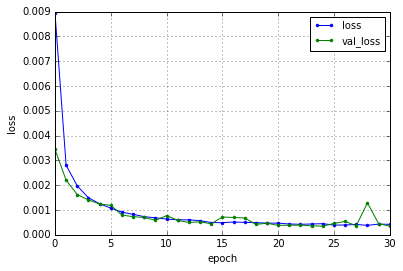

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0263 - val_loss: 0.0126
Epoch 2/50
0s - loss: 0.0057 - val_loss: 0.0044
Epoch 3/50
0s - loss: 0.0036 - val_loss: 0.0027
Epoch 4/50
0s - loss: 0.0026 - val_loss: 0.0040
Epoch 5/50
0s - loss: 0.0021 - val_loss: 0.0046
Epoch 6/50
0s - loss: 0.0015 - val_loss: 0.0192
Epoch 7/50
0s - loss: 0.0016 - val_loss: 9.9838e-04
Epoch 8/50
0s - loss: 0.0010 - val_loss: 0.0010
Epoch 9/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 10/50
0s - loss: 7.9797e-04 - val_loss: 7.1192e-04
Epoch 11/50
0s - loss: 0.0010 - val_loss: 0.0011
Epoch 12/50
0s - loss: 8.4110e-04 - val_loss: 6.5381e-04
Epoch 13/50
0s - loss: 7.2353e-04 - val_loss: 0.0081
Epoch 14/50
0s - loss: 9.5003e-04 - val_loss: 5.9190e-04
Epoch 15/50
0s - loss: 6.1998e-04 - val_loss: 5.9292e-04
Epoch 16/50
0s - loss: 7.3368e-04 - val_loss: 9.3040e-04
Epoch 17/50
0s - loss: 6.1229e-04 - val_loss: 0.0040
Epoch 18/50
0s - loss: 7.7052e-04 - val_loss: 4.5108e-04
E

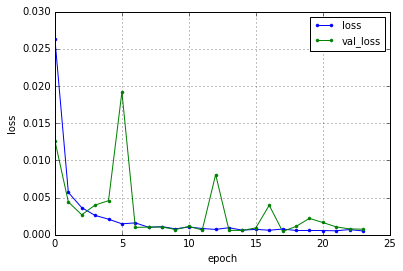

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0432 - val_loss: 0.0104
Epoch 2/50
0s - loss: 0.0078 - val_loss: 0.0061
Epoch 3/50
0s - loss: 0.0050 - val_loss: 0.0056
Epoch 4/50
0s - loss: 0.0039 - val_loss: 0.0064
Epoch 5/50
0s - loss: 0.0034 - val_loss: 0.0044
Epoch 6/50
0s - loss: 0.0025 - val_loss: 0.0025
Epoch 7/50
0s - loss: 0.0021 - val_loss: 0.0019
Epoch 8/50
0s - loss: 0.0019 - val_loss: 0.0013
Epoch 9/50
0s - loss: 0.0016 - val_loss: 0.0050
Epoch 10/50
0s - loss: 0.0016 - val_loss: 0.0010
Epoch 11/50
0s - loss: 0.0014 - val_loss: 9.9391e-04
Epoch 12/50
0s - loss: 0.0014 - val_loss: 0.0018
Epoch 13/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 14/50
0s - loss: 0.0012 - val_loss: 0.0020
Epoch 15/50
0s - loss: 0.0011 - val_loss: 0.0043
Epoch 16/50
0s - loss: 9.5405e-04 - val_loss: 0.0013
Epoch 17/50
0s - loss: 0.0012 - val_loss: 0.0014


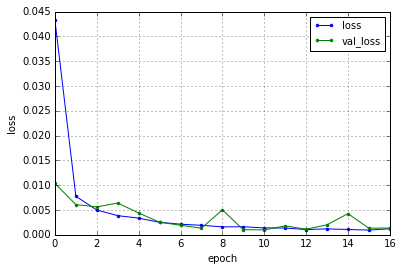

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0083 - val_loss: 0.0024
Epoch 2/50
0s - loss: 0.0021 - val_loss: 0.0016
Epoch 3/50
0s - loss: 0.0015 - val_loss: 0.0018
Epoch 4/50
0s - loss: 0.0012 - val_loss: 0.0036
Epoch 5/50
0s - loss: 0.0011 - val_loss: 8.3053e-04
Epoch 6/50
0s - loss: 0.0010 - val_loss: 9.9724e-04
Epoch 7/50
0s - loss: 8.1496e-04 - val_loss: 6.3912e-04
Epoch 8/50
0s - loss: 8.8962e-04 - val_loss: 7.0107e-04
Epoch 9/50
0s - loss: 7.0221e-04 - val_loss: 5.7911e-04
Epoch 10/50
0s - loss: 6.5379e-04 - val_loss: 8.3042e-04
Epoch 11/50
0s - loss: 7.0140e-04 - val_loss: 0.0012
Epoch 12/50
0s - loss: 6.4486e-04 - val_loss: 9.3497e-04
Epoch 13/50
0s - loss: 6.4058e-04 - val_loss: 5.5887e-04
Epoch 14/50
0s - loss: 5.5840e-04 - val_loss: 4.8168e-04
Epoch 15/50
0s - loss: 6.0530e-04 - val_loss: 4.4765e-04
Epoch 16/50
0s - loss: 6.0360e-04 - val_loss: 5.0282e-04
Epoch 17/50
0s - loss: 7.3137e-04 - val_loss: 6.9765e-04
Epoch 18/50
0s - l

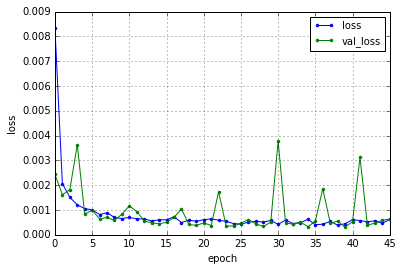

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0189 - val_loss: 0.0089
Epoch 2/50
0s - loss: 0.0081 - val_loss: 0.0073
Epoch 3/50
0s - loss: 0.0062 - val_loss: 0.0086
Epoch 4/50
0s - loss: 0.0052 - val_loss: 0.0050
Epoch 5/50
0s - loss: 0.0044 - val_loss: 0.0039
Epoch 6/50
0s - loss: 0.0040 - val_loss: 0.0035
Epoch 7/50
0s - loss: 0.0036 - val_loss: 0.0055
Epoch 8/50
0s - loss: 0.0032 - val_loss: 0.0029
Epoch 9/50
0s - loss: 0.0030 - val_loss: 0.0030
Epoch 10/50
0s - loss: 0.0028 - val_loss: 0.0026
Epoch 11/50
0s - loss: 0.0026 - val_loss: 0.0023
Epoch 12/50
0s - loss: 0.0024 - val_loss: 0.0099
Epoch 13/50
0s - loss: 0.0023 - val_loss: 0.0021
Epoch 14/50
0s - loss: 0.0022 - val_loss: 0.0031
Epoch 15/50
0s - loss: 0.0020 - val_loss: 0.0040
Epoch 16/50
0s - loss: 0.0020 - val_loss: 0.0060
Epoch 17/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 18/50
0s - loss: 0.0017 - val_loss: 0.0170
Epoch 19/50
0s - loss: 0.0017 - val_loss: 0.0035
Epoch 20/50


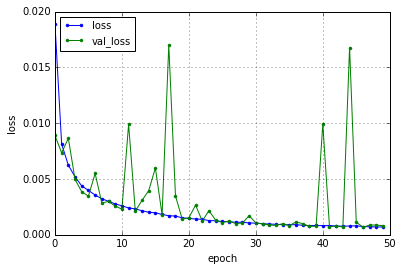

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0302 - val_loss: 0.0154
Epoch 2/50
0s - loss: 0.0126 - val_loss: 0.0125
Epoch 3/50
0s - loss: 0.0096 - val_loss: 0.0087
Epoch 4/50
0s - loss: 0.0081 - val_loss: 0.0065
Epoch 5/50
0s - loss: 0.0068 - val_loss: 0.0067
Epoch 6/50
0s - loss: 0.0061 - val_loss: 0.0057
Epoch 7/50
0s - loss: 0.0057 - val_loss: 0.0048
Epoch 8/50
0s - loss: 0.0050 - val_loss: 0.0046
Epoch 9/50
0s - loss: 0.0045 - val_loss: 0.0084
Epoch 10/50
0s - loss: 0.0044 - val_loss: 0.0061
Epoch 11/50
0s - loss: 0.0041 - val_loss: 0.0034
Epoch 12/50
0s - loss: 0.0037 - val_loss: 0.0033
Epoch 13/50
0s - loss: 0.0037 - val_loss: 0.0031
Epoch 14/50
0s - loss: 0.0034 - val_loss: 0.0029
Epoch 15/50
0s - loss: 0.0031 - val_loss: 0.0036
Epoch 16/50
0s - loss: 0.0034 - val_loss: 0.0075
Epoch 17/50
0s - loss: 0.0029 - val_loss: 0.0029
Epoch 18/50
0s - loss: 0.0029 - val_loss: 0.0025
Epoch 19/50
0s - loss: 0.0029 - val_loss: 0.0027
Epoch 20/50


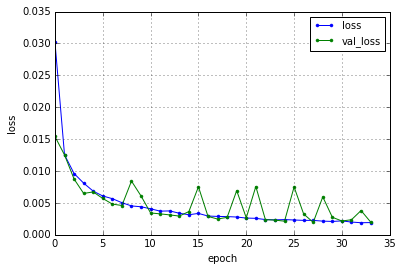

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0065 - val_loss: 0.0035
Epoch 2/50
0s - loss: 0.0027 - val_loss: 0.0022
Epoch 3/50
0s - loss: 0.0021 - val_loss: 0.0018
Epoch 4/50
0s - loss: 0.0018 - val_loss: 0.0055
Epoch 5/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 6/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 7/50
0s - loss: 0.0014 - val_loss: 0.0018
Epoch 8/50
0s - loss: 0.0013 - val_loss: 0.0016
Epoch 9/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
0s - loss: 0.0012 - val_loss: 0.0015
Epoch 11/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 12/50
0s - loss: 0.0011 - val_loss: 0.0015
Epoch 13/50
0s - loss: 0.0010 - val_loss: 0.0014
Epoch 14/50
0s - loss: 9.9714e-04 - val_loss: 0.0011
Epoch 15/50
0s - loss: 9.5337e-04 - val_loss: 9.4630e-04
Epoch 16/50
0s - loss: 9.1914e-04 - val_loss: 8.6148e-04
Epoch 17/50
0s - loss: 8.9465e-04 - val_loss: 8.6723e-04
Epoch 18/50
0s - loss: 8.7326e-04 - val_loss: 0.0011
Epoch 19/50
0s - loss: 8.3988

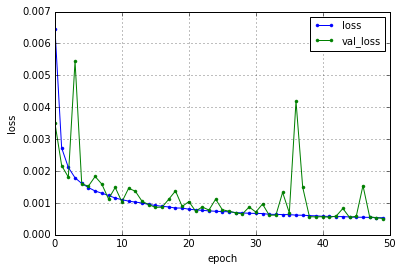

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0209 - val_loss: 0.0341
Epoch 2/50
0s - loss: 0.0094 - val_loss: 0.0149
Epoch 3/50
0s - loss: 0.0078 - val_loss: 0.0056
Epoch 4/50
0s - loss: 0.0067 - val_loss: 0.0248
Epoch 5/50
0s - loss: 0.0062 - val_loss: 0.0188
Epoch 6/50
0s - loss: 0.0058 - val_loss: 0.0107
Epoch 7/50
0s - loss: 0.0054 - val_loss: 0.0033
Epoch 8/50
0s - loss: 0.0054 - val_loss: 0.0181
Epoch 9/50
0s - loss: 0.0051 - val_loss: 0.0052
Epoch 10/50
0s - loss: 0.0049 - val_loss: 0.0025
Epoch 11/50
0s - loss: 0.0048 - val_loss: 0.0082
Epoch 12/50
0s - loss: 0.0048 - val_loss: 0.0081
Epoch 13/50
0s - loss: 0.0046 - val_loss: 0.0134
Epoch 14/50
0s - loss: 0.0046 - val_loss: 0.0065
Epoch 15/50
0s - loss: 0.0045 - val_loss: 0.0086
Epoch 16/50
0s - loss: 0.0044 - val_loss: 0.0031


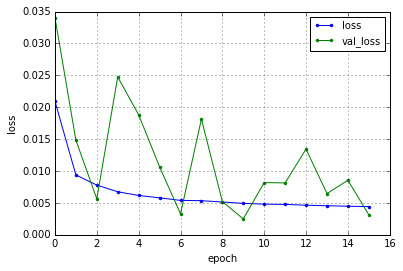

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0418 - val_loss: 0.0141
Epoch 2/50
0s - loss: 0.0161 - val_loss: 0.0148
Epoch 3/50
0s - loss: 0.0148 - val_loss: 0.0122
Epoch 4/50
0s - loss: 0.0140 - val_loss: 0.0124
Epoch 5/50
0s - loss: 0.0135 - val_loss: 0.0591
Epoch 6/50
0s - loss: 0.0131 - val_loss: 0.0263
Epoch 7/50
0s - loss: 0.0127 - val_loss: 0.0159
Epoch 8/50
0s - loss: 0.0124 - val_loss: 0.0064
Epoch 9/50
0s - loss: 0.0123 - val_loss: 0.0283
Epoch 10/50
0s - loss: 0.0118 - val_loss: 0.0111
Epoch 11/50
0s - loss: 0.0114 - val_loss: 0.0117
Epoch 12/50
0s - loss: 0.0112 - val_loss: 0.0117
Epoch 13/50
0s - loss: 0.0111 - val_loss: 0.0054
Epoch 14/50
0s - loss: 0.0110 - val_loss: 0.0127
Epoch 15/50
0s - loss: 0.0108 - val_loss: 0.0082
Epoch 16/50
0s - loss: 0.0105 - val_loss: 0.0412
Epoch 17/50
0s - loss: 0.0103 - val_loss: 0.0063
Epoch 18/50
0s - loss: 0.0100 - val_loss: 0.0178
Epoch 19/50
0s - loss: 0.0099 - val_loss: 0.0116


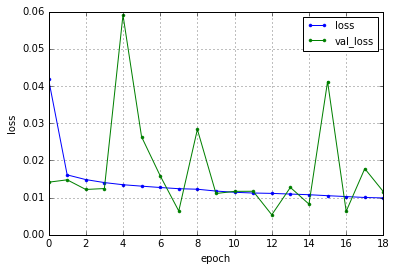

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0074 - val_loss: 0.0025
Epoch 2/50
0s - loss: 0.0031 - val_loss: 0.0101
Epoch 3/50
0s - loss: 0.0028 - val_loss: 0.0019
Epoch 4/50
0s - loss: 0.0025 - val_loss: 0.0015
Epoch 5/50
0s - loss: 0.0024 - val_loss: 0.0035
Epoch 6/50
0s - loss: 0.0024 - val_loss: 0.0016
Epoch 7/50
0s - loss: 0.0023 - val_loss: 0.0139
Epoch 8/50
0s - loss: 0.0022 - val_loss: 0.0048
Epoch 9/50
0s - loss: 0.0022 - val_loss: 0.0016
Epoch 10/50
0s - loss: 0.0022 - val_loss: 0.0109


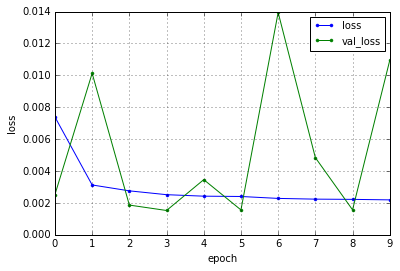

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0233 - val_loss: 0.0108
Epoch 2/50
0s - loss: 0.0092 - val_loss: 0.0049
Epoch 3/50
0s - loss: 0.0069 - val_loss: 0.0046
Epoch 4/50
0s - loss: 0.0062 - val_loss: 0.0047
Epoch 5/50
0s - loss: 0.0047 - val_loss: 0.0053
Epoch 6/50
0s - loss: 0.0041 - val_loss: 0.0022
Epoch 7/50
0s - loss: 0.0037 - val_loss: 0.0029
Epoch 8/50
0s - loss: 0.0037 - val_loss: 0.0044
Epoch 9/50
0s - loss: 0.0033 - val_loss: 0.0042
Epoch 10/50
0s - loss: 0.0031 - val_loss: 0.0065
Epoch 11/50
0s - loss: 0.0032 - val_loss: 0.0020
Epoch 12/50
0s - loss: 0.0029 - val_loss: 0.0014
Epoch 13/50
0s - loss: 0.0028 - val_loss: 0.0016
Epoch 14/50
0s - loss: 0.0026 - val_loss: 0.0070
Epoch 15/50
0s - loss: 0.0025 - val_loss: 0.0016
Epoch 16/50
0s - loss: 0.0024 - val_loss: 0.0045
Epoch 17/50
0s - loss: 0.0024 - val_loss: 0.0048
Epoch 18/50
0s - loss: 0.0021 - val_loss: 0.0092


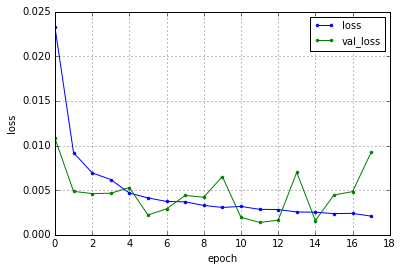

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0417 - val_loss: 0.0141
Epoch 2/50
0s - loss: 0.0168 - val_loss: 0.0146
Epoch 3/50
0s - loss: 0.0150 - val_loss: 0.0208
Epoch 4/50
0s - loss: 0.0130 - val_loss: 0.0078
Epoch 5/50
0s - loss: 0.0114 - val_loss: 0.0084
Epoch 6/50
0s - loss: 0.0103 - val_loss: 0.0073
Epoch 7/50
0s - loss: 0.0094 - val_loss: 0.0067
Epoch 8/50
0s - loss: 0.0084 - val_loss: 0.0113
Epoch 9/50
0s - loss: 0.0075 - val_loss: 0.0037
Epoch 10/50
0s - loss: 0.0072 - val_loss: 0.0147
Epoch 11/50
0s - loss: 0.0065 - val_loss: 0.0045
Epoch 12/50
0s - loss: 0.0059 - val_loss: 0.0047
Epoch 13/50
0s - loss: 0.0055 - val_loss: 0.0088
Epoch 14/50
0s - loss: 0.0050 - val_loss: 0.0024
Epoch 15/50
0s - loss: 0.0048 - val_loss: 0.0252
Epoch 16/50
0s - loss: 0.0046 - val_loss: 0.0035
Epoch 17/50
0s - loss: 0.0042 - val_loss: 0.0471
Epoch 18/50
0s - loss: 0.0041 - val_loss: 0.0023
Epoch 19/50
0s - loss: 0.0039 - val_loss: 0.0083
Epoch 20/50


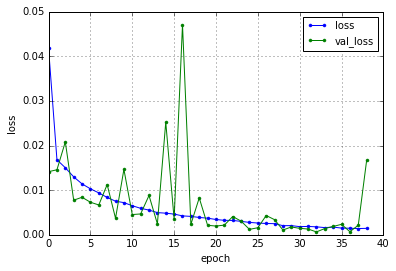

hiden node = 32
Train on 15906 samples, validate on 15906 samples
Epoch 1/50
0s - loss: 0.0067 - val_loss: 0.0097
Epoch 2/50
0s - loss: 0.0030 - val_loss: 0.0022
Epoch 3/50
0s - loss: 0.0028 - val_loss: 0.0018
Epoch 4/50
0s - loss: 0.0026 - val_loss: 0.0062
Epoch 5/50
0s - loss: 0.0022 - val_loss: 0.0026
Epoch 6/50
0s - loss: 0.0021 - val_loss: 0.0037
Epoch 7/50
0s - loss: 0.0022 - val_loss: 0.0015
Epoch 8/50
0s - loss: 0.0017 - val_loss: 0.0029
Epoch 9/50
0s - loss: 0.0016 - val_loss: 0.0021
Epoch 10/50
0s - loss: 0.0017 - val_loss: 0.0012
Epoch 11/50
0s - loss: 0.0017 - val_loss: 0.0018
Epoch 12/50
0s - loss: 0.0014 - val_loss: 0.0011
Epoch 13/50
0s - loss: 0.0013 - val_loss: 7.0621e-04
Epoch 14/50
0s - loss: 0.0013 - val_loss: 8.2212e-04
Epoch 15/50
0s - loss: 0.0014 - val_loss: 6.3164e-04
Epoch 16/50
0s - loss: 0.0013 - val_loss: 0.0023
Epoch 17/50
0s - loss: 0.0012 - val_loss: 7.5507e-04
Epoch 18/50
0s - loss: 9.1956e-04 - val_loss: 0.0036
Epoch 19/50
0s - loss: 0.0011 - val_loss:

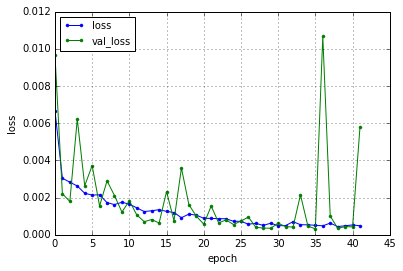

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15890
SourceData's aborting data = 6
window shape is (15890, 512, 3)
(15890, 512, 3)
hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.2838 - val_loss: 0.2478
Epoch 2/50
0s - loss: 0.2165 - val_loss: 0.1860
Epoch 3/50
0s - loss: 0.1598 - val_loss: 0.1363
Epoch 4/50
0s - loss: 0.1185 - val_loss: 0.1030
Epoch 5/50
0s - loss: 0.0919 - val_loss: 0.0822
Epoch 6/50
0s - loss: 0.0752 - val_loss: 0.0691
Epoch 7/50
0s - loss: 0.0644 - val_loss: 0.0602
Epoch 8/50
0s - loss: 0.0569 - val_loss: 0.0539
Epoch 9/50
0s - loss: 0.0516 - val_loss: 0.0494
Epoch 10/50
0s - loss: 0.0476 - val_loss: 0.0460
Epoch 11/50
0s - loss: 0.0446 - val_loss: 0.0433
Epoch 12/50
0s - loss: 0.0423 - val_loss: 0.0413
Epoch 13/50
0s - loss: 0.0404 - val_loss: 0.0396
Epoch 14/50
0s - loss: 0.0389 - val_loss: 0.0383
Epoch 15/50
0s - loss: 0.0377 - val_loss: 0.0371
Epoch 16/50
0s 

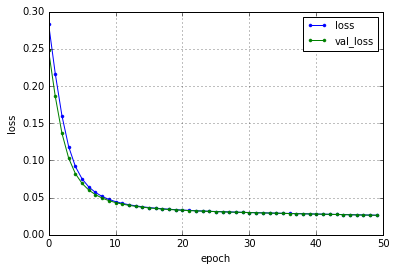

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.6018 - val_loss: 0.4123
Epoch 2/50
0s - loss: 0.2821 - val_loss: 0.1877
Epoch 3/50
0s - loss: 0.1413 - val_loss: 0.1083
Epoch 4/50
0s - loss: 0.0910 - val_loss: 0.0779
Epoch 5/50
1s - loss: 0.0700 - val_loss: 0.0637
Epoch 6/50
1s - loss: 0.0595 - val_loss: 0.0561
Epoch 7/50
1s - loss: 0.0537 - val_loss: 0.0516
Epoch 8/50
1s - loss: 0.0500 - val_loss: 0.0486
Epoch 9/50
0s - loss: 0.0475 - val_loss: 0.0465
Epoch 10/50
1s - loss: 0.0456 - val_loss: 0.0448
Epoch 11/50
1s - loss: 0.0442 - val_loss: 0.0436
Epoch 12/50
1s - loss: 0.0430 - val_loss: 0.0425
Epoch 13/50
1s - loss: 0.0421 - val_loss: 0.0416
Epoch 14/50
0s - loss: 0.0413 - val_loss: 0.0409
Epoch 15/50
0s - loss: 0.0405 - val_loss: 0.0402
Epoch 16/50
0s - loss: 0.0399 - val_loss: 0.0396
Epoch 17/50
0s - loss: 0.0394 - val_loss: 0.0391
Epoch 18/50
0s - loss: 0.0389 - val_loss: 0.0386
Epoch 19/50
0s - loss: 0.0384 - val_loss: 0.0382
Epoch 20/50


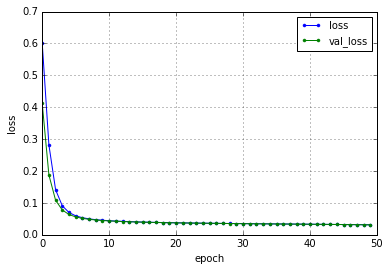

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0857 - val_loss: 0.0814
Epoch 2/50
1s - loss: 0.0790 - val_loss: 0.0769
Epoch 3/50
0s - loss: 0.0749 - val_loss: 0.0728
Epoch 4/50
0s - loss: 0.0706 - val_loss: 0.0682
Epoch 5/50
0s - loss: 0.0657 - val_loss: 0.0631
Epoch 6/50
0s - loss: 0.0605 - val_loss: 0.0578
Epoch 7/50
0s - loss: 0.0552 - val_loss: 0.0526
Epoch 8/50
0s - loss: 0.0502 - val_loss: 0.0478
Epoch 9/50
0s - loss: 0.0457 - val_loss: 0.0436
Epoch 10/50
0s - loss: 0.0417 - val_loss: 0.0400
Epoch 11/50
0s - loss: 0.0384 - val_loss: 0.0369
Epoch 12/50
0s - loss: 0.0356 - val_loss: 0.0344
Epoch 13/50
0s - loss: 0.0334 - val_loss: 0.0324
Epoch 14/50
0s - loss: 0.0315 - val_loss: 0.0307
Epoch 15/50
0s - loss: 0.0300 - val_loss: 0.0294
Epoch 16/50
0s - loss: 0.0288 - val_loss: 0.0282
Epoch 17/50
0s - loss: 0.0277 - val_loss: 0.0272
Epoch 18/50
0s - loss: 0.0268 - val_loss: 0.0264
Epoch 19/50
0s - loss: 0.0260 - val_loss: 0.0257
Epoch 20/50


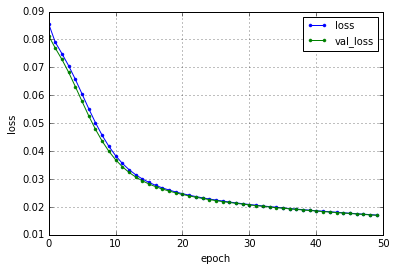

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0503 - val_loss: 0.0267
Epoch 2/50
0s - loss: 0.0194 - val_loss: 0.0159
Epoch 3/50
0s - loss: 0.0156 - val_loss: 0.0128
Epoch 4/50
0s - loss: 0.0134 - val_loss: 0.0111
Epoch 5/50
0s - loss: 0.0122 - val_loss: 0.0147
Epoch 6/50
0s - loss: 0.0112 - val_loss: 0.0096
Epoch 7/50
0s - loss: 0.0106 - val_loss: 0.0097
Epoch 8/50
0s - loss: 0.0102 - val_loss: 0.0115
Epoch 9/50
0s - loss: 0.0093 - val_loss: 0.0124
Epoch 10/50
0s - loss: 0.0089 - val_loss: 0.0077
Epoch 11/50
0s - loss: 0.0088 - val_loss: 0.0069
Epoch 12/50
0s - loss: 0.0083 - val_loss: 0.0147
Epoch 13/50
0s - loss: 0.0084 - val_loss: 0.0069
Epoch 14/50
0s - loss: 0.0077 - val_loss: 0.0072
Epoch 15/50
0s - loss: 0.0076 - val_loss: 0.0071
Epoch 16/50
0s - loss: 0.0073 - val_loss: 0.0068
Epoch 17/50
0s - loss: 0.0072 - val_loss: 0.0072
Epoch 18/50
0s - loss: 0.0071 - val_loss: 0.0068
Epoch 19/50
0s - loss: 0.0069 - val_loss: 0.0059
Epoch 20/50


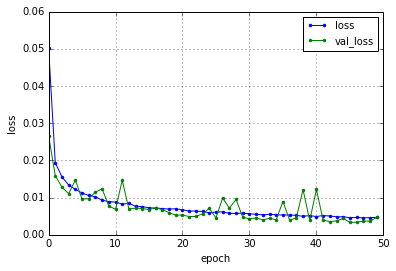

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0785 - val_loss: 0.0405
Epoch 2/50
0s - loss: 0.0277 - val_loss: 0.0231
Epoch 3/50
0s - loss: 0.0193 - val_loss: 0.0169
Epoch 4/50
1s - loss: 0.0169 - val_loss: 0.0137
Epoch 5/50
0s - loss: 0.0156 - val_loss: 0.0144
Epoch 6/50
0s - loss: 0.0147 - val_loss: 0.0107
Epoch 7/50
0s - loss: 0.0137 - val_loss: 0.0124
Epoch 8/50
0s - loss: 0.0131 - val_loss: 0.0271
Epoch 9/50
0s - loss: 0.0128 - val_loss: 0.0121
Epoch 10/50
0s - loss: 0.0124 - val_loss: 0.0121
Epoch 11/50
0s - loss: 0.0122 - val_loss: 0.0094
Epoch 12/50
0s - loss: 0.0115 - val_loss: 0.0093
Epoch 13/50
0s - loss: 0.0111 - val_loss: 0.0088
Epoch 14/50
0s - loss: 0.0109 - val_loss: 0.0081
Epoch 15/50
0s - loss: 0.0108 - val_loss: 0.0115
Epoch 16/50
0s - loss: 0.0108 - val_loss: 0.0072
Epoch 17/50
0s - loss: 0.0106 - val_loss: 0.0106
Epoch 18/50
0s - loss: 0.0101 - val_loss: 0.0248
Epoch 19/50
0s - loss: 0.0102 - val_loss: 0.0130
Epoch 20/50


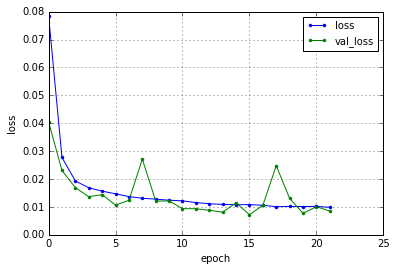

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0242 - val_loss: 0.0123
Epoch 2/50
0s - loss: 0.0097 - val_loss: 0.0080
Epoch 3/50
0s - loss: 0.0070 - val_loss: 0.0063
Epoch 4/50
0s - loss: 0.0058 - val_loss: 0.0054
Epoch 5/50
0s - loss: 0.0051 - val_loss: 0.0048
Epoch 6/50
0s - loss: 0.0046 - val_loss: 0.0043
Epoch 7/50
0s - loss: 0.0042 - val_loss: 0.0040
Epoch 8/50
0s - loss: 0.0039 - val_loss: 0.0040
Epoch 9/50
0s - loss: 0.0038 - val_loss: 0.0037
Epoch 10/50
0s - loss: 0.0036 - val_loss: 0.0036
Epoch 11/50
0s - loss: 0.0035 - val_loss: 0.0054
Epoch 12/50
0s - loss: 0.0034 - val_loss: 0.0034
Epoch 13/50
0s - loss: 0.0033 - val_loss: 0.0031
Epoch 14/50
0s - loss: 0.0032 - val_loss: 0.0029
Epoch 15/50
0s - loss: 0.0031 - val_loss: 0.0029
Epoch 16/50
0s - loss: 0.0029 - val_loss: 0.0027
Epoch 17/50
0s - loss: 0.0029 - val_loss: 0.0026
Epoch 18/50
0s - loss: 0.0028 - val_loss: 0.0038
Epoch 19/50
0s - loss: 0.0027 - val_loss: 0.0025
Epoch 20/50


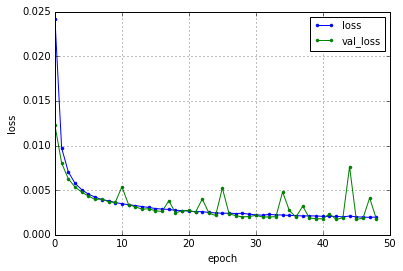

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0271 - val_loss: 0.0134
Epoch 2/50
0s - loss: 0.0106 - val_loss: 0.0082
Epoch 3/50
0s - loss: 0.0072 - val_loss: 0.0059
Epoch 4/50
0s - loss: 0.0055 - val_loss: 0.0050
Epoch 5/50
0s - loss: 0.0042 - val_loss: 0.0036
Epoch 6/50
0s - loss: 0.0034 - val_loss: 0.0031
Epoch 7/50
0s - loss: 0.0030 - val_loss: 0.0028
Epoch 8/50
0s - loss: 0.0025 - val_loss: 0.0020
Epoch 9/50
0s - loss: 0.0021 - val_loss: 0.0019
Epoch 10/50
0s - loss: 0.0020 - val_loss: 0.0015
Epoch 11/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 12/50
0s - loss: 0.0016 - val_loss: 0.0013
Epoch 13/50
0s - loss: 0.0015 - val_loss: 0.0012
Epoch 14/50
0s - loss: 0.0014 - val_loss: 0.0011
Epoch 15/50
0s - loss: 0.0013 - val_loss: 0.0017
Epoch 16/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 17/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 18/50
0s - loss: 0.0012 - val_loss: 0.0016
Epoch 19/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 20/50


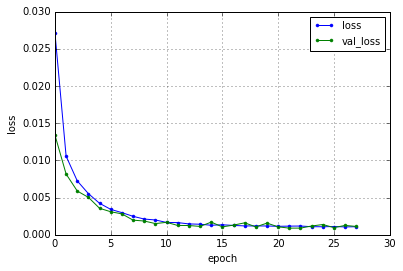

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0472 - val_loss: 0.0201
Epoch 2/50
0s - loss: 0.0144 - val_loss: 0.0107
Epoch 3/50
0s - loss: 0.0092 - val_loss: 0.0073
Epoch 4/50
0s - loss: 0.0064 - val_loss: 0.0052
Epoch 5/50
0s - loss: 0.0050 - val_loss: 0.0046
Epoch 6/50
0s - loss: 0.0039 - val_loss: 0.0036
Epoch 7/50
0s - loss: 0.0032 - val_loss: 0.0025
Epoch 8/50
0s - loss: 0.0028 - val_loss: 0.0023
Epoch 9/50
0s - loss: 0.0024 - val_loss: 0.0022
Epoch 10/50
0s - loss: 0.0023 - val_loss: 0.0024
Epoch 11/50
0s - loss: 0.0020 - val_loss: 0.0018
Epoch 12/50
0s - loss: 0.0019 - val_loss: 0.0026
Epoch 13/50
0s - loss: 0.0017 - val_loss: 0.0014
Epoch 14/50
0s - loss: 0.0017 - val_loss: 0.0022
Epoch 15/50
0s - loss: 0.0016 - val_loss: 0.0017
Epoch 16/50
0s - loss: 0.0015 - val_loss: 0.0013
Epoch 17/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 18/50
0s - loss: 0.0015 - val_loss: 0.0023
Epoch 19/50
0s - loss: 0.0014 - val_loss: 0.0012
Epoch 20/50


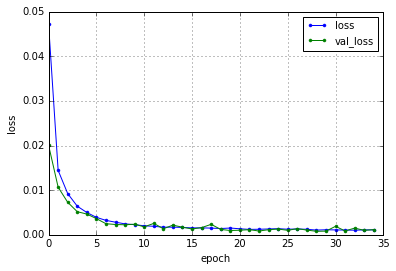

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0093 - val_loss: 0.0042
Epoch 2/50
0s - loss: 0.0034 - val_loss: 0.0028
Epoch 3/50
0s - loss: 0.0024 - val_loss: 0.0027
Epoch 4/50
0s - loss: 0.0019 - val_loss: 0.0022
Epoch 5/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 6/50
0s - loss: 0.0015 - val_loss: 0.0019
Epoch 7/50
0s - loss: 0.0015 - val_loss: 0.0012
Epoch 8/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 9/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
0s - loss: 0.0012 - val_loss: 0.0010
Epoch 11/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 12/50
0s - loss: 0.0012 - val_loss: 9.8505e-04
Epoch 13/50
0s - loss: 0.0011 - val_loss: 9.2810e-04
Epoch 14/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 15/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 16/50
0s - loss: 9.6283e-04 - val_loss: 8.6718e-04
Epoch 17/50
0s - loss: 9.2732e-04 - val_loss: 0.0014
Epoch 18/50
0s - loss: 9.6166e-04 - val_loss: 7.7978e-04
Epoch 19/50
0s - loss: 9.5561e-04

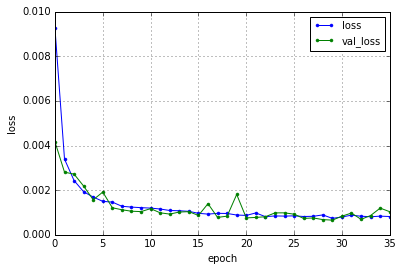

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0283 - val_loss: 0.0101
Epoch 2/50
0s - loss: 0.0086 - val_loss: 0.0062
Epoch 3/50
1s - loss: 0.0058 - val_loss: 0.0046
Epoch 4/50
1s - loss: 0.0044 - val_loss: 0.0045
Epoch 5/50
0s - loss: 0.0036 - val_loss: 0.0028
Epoch 6/50
0s - loss: 0.0033 - val_loss: 0.0024
Epoch 7/50
0s - loss: 0.0029 - val_loss: 0.0027
Epoch 8/50
1s - loss: 0.0024 - val_loss: 0.0018
Epoch 9/50
1s - loss: 0.0022 - val_loss: 0.0016
Epoch 10/50
1s - loss: 0.0019 - val_loss: 0.0016
Epoch 11/50
1s - loss: 0.0019 - val_loss: 0.0013
Epoch 12/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 13/50
0s - loss: 0.0014 - val_loss: 0.0017
Epoch 14/50
0s - loss: 0.0015 - val_loss: 0.0035
Epoch 15/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 16/50
0s - loss: 0.0016 - val_loss: 0.0012
Epoch 17/50
0s - loss: 0.0014 - val_loss: 0.0017
Epoch 18/50
0s - loss: 0.0015 - val_loss: 0.0011
Epoch 19/50
0s - loss: 0.0013 - val_loss: 0.0014
Epoch 20/50


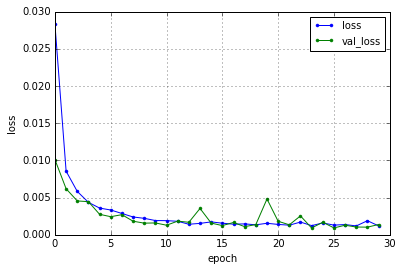

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
1s - loss: 0.0493 - val_loss: 0.0154
Epoch 2/50
1s - loss: 0.0107 - val_loss: 0.0101
Epoch 3/50
0s - loss: 0.0068 - val_loss: 0.0063
Epoch 4/50
0s - loss: 0.0055 - val_loss: 0.0045
Epoch 5/50
0s - loss: 0.0046 - val_loss: 0.0055
Epoch 6/50
0s - loss: 0.0038 - val_loss: 0.0090
Epoch 7/50
0s - loss: 0.0035 - val_loss: 0.0027
Epoch 8/50
0s - loss: 0.0030 - val_loss: 0.0026
Epoch 9/50
0s - loss: 0.0027 - val_loss: 0.0023
Epoch 10/50
0s - loss: 0.0026 - val_loss: 0.0026
Epoch 11/50
0s - loss: 0.0024 - val_loss: 0.0024
Epoch 12/50
0s - loss: 0.0023 - val_loss: 0.0016
Epoch 13/50
0s - loss: 0.0023 - val_loss: 0.0017
Epoch 14/50
0s - loss: 0.0021 - val_loss: 0.0016
Epoch 15/50
0s - loss: 0.0019 - val_loss: 0.0013
Epoch 16/50
0s - loss: 0.0019 - val_loss: 0.0013
Epoch 17/50
0s - loss: 0.0017 - val_loss: 0.0014
Epoch 18/50
0s - loss: 0.0021 - val_loss: 0.0012
Epoch 19/50
0s - loss: 0.0018 - val_loss: 0.0015
Epoch 20/50


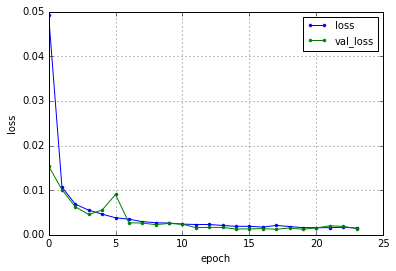

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0093 - val_loss: 0.0046
Epoch 2/50
0s - loss: 0.0031 - val_loss: 0.0022
Epoch 3/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 4/50
0s - loss: 0.0020 - val_loss: 0.0023
Epoch 5/50
0s - loss: 0.0019 - val_loss: 0.0026
Epoch 6/50
0s - loss: 0.0015 - val_loss: 0.0024
Epoch 7/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 8/50
0s - loss: 0.0014 - val_loss: 0.0012
Epoch 9/50
0s - loss: 0.0012 - val_loss: 0.0018
Epoch 10/50
0s - loss: 0.0015 - val_loss: 0.0011
Epoch 11/50
0s - loss: 0.0013 - val_loss: 9.7861e-04
Epoch 12/50
0s - loss: 0.0014 - val_loss: 0.0011
Epoch 13/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 14/50
0s - loss: 0.0013 - val_loss: 0.0011
Epoch 15/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 16/50
1s - loss: 0.0012 - val_loss: 0.0014
Epoch 17/50
0s - loss: 0.0012 - val_loss: 9.7197e-04
Epoch 18/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 19/50
0s - loss: 0.0014 - val_loss: 0.0015
Epoc

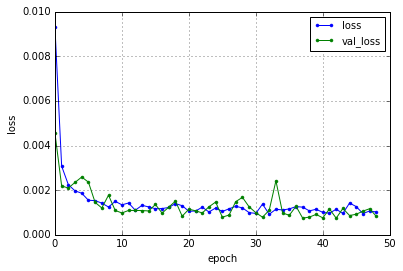

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0265 - val_loss: 0.0328
Epoch 2/50
0s - loss: 0.0131 - val_loss: 0.0100
Epoch 3/50
0s - loss: 0.0102 - val_loss: 0.0083
Epoch 4/50
0s - loss: 0.0085 - val_loss: 0.0108
Epoch 5/50
0s - loss: 0.0076 - val_loss: 0.0067
Epoch 6/50
0s - loss: 0.0069 - val_loss: 0.0104
Epoch 7/50
0s - loss: 0.0061 - val_loss: 0.0059
Epoch 8/50
0s - loss: 0.0059 - val_loss: 0.0051
Epoch 9/50
0s - loss: 0.0054 - val_loss: 0.0047
Epoch 10/50
0s - loss: 0.0050 - val_loss: 0.0045
Epoch 11/50
0s - loss: 0.0048 - val_loss: 0.0048
Epoch 12/50
0s - loss: 0.0047 - val_loss: 0.0044
Epoch 13/50
0s - loss: 0.0043 - val_loss: 0.0039
Epoch 14/50
0s - loss: 0.0044 - val_loss: 0.0040
Epoch 15/50
0s - loss: 0.0040 - val_loss: 0.0037
Epoch 16/50
0s - loss: 0.0039 - val_loss: 0.0047
Epoch 17/50
0s - loss: 0.0039 - val_loss: 0.0035
Epoch 18/50
0s - loss: 0.0036 - val_loss: 0.0033
Epoch 19/50
0s - loss: 0.0037 - val_loss: 0.0046
Epoch 20/50


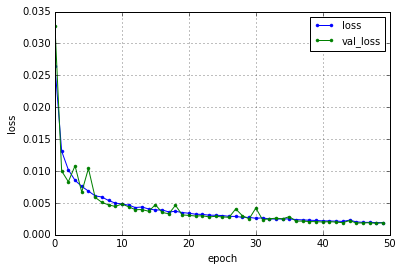

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0471 - val_loss: 0.0216
Epoch 2/50
0s - loss: 0.0197 - val_loss: 0.0140
Epoch 3/50
0s - loss: 0.0147 - val_loss: 0.0133
Epoch 4/50
0s - loss: 0.0121 - val_loss: 0.0101
Epoch 5/50
0s - loss: 0.0106 - val_loss: 0.0119
Epoch 6/50
0s - loss: 0.0094 - val_loss: 0.0076
Epoch 7/50
0s - loss: 0.0083 - val_loss: 0.0067
Epoch 8/50
0s - loss: 0.0077 - val_loss: 0.0101
Epoch 9/50
0s - loss: 0.0072 - val_loss: 0.0058
Epoch 10/50
0s - loss: 0.0067 - val_loss: 0.0055
Epoch 11/50
0s - loss: 0.0065 - val_loss: 0.0056
Epoch 12/50
0s - loss: 0.0059 - val_loss: 0.0078
Epoch 13/50
0s - loss: 0.0058 - val_loss: 0.0055
Epoch 14/50
0s - loss: 0.0056 - val_loss: 0.0048
Epoch 15/50
0s - loss: 0.0052 - val_loss: 0.0065
Epoch 16/50
0s - loss: 0.0051 - val_loss: 0.0048
Epoch 17/50
0s - loss: 0.0050 - val_loss: 0.0076
Epoch 18/50
0s - loss: 0.0048 - val_loss: 0.0047
Epoch 19/50
0s - loss: 0.0048 - val_loss: 0.0052
Epoch 20/50


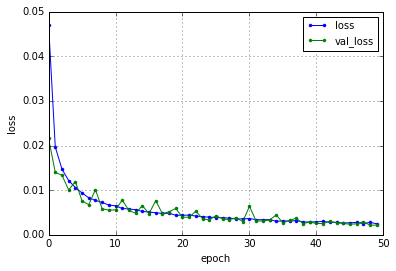

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0093 - val_loss: 0.0047
Epoch 2/50
0s - loss: 0.0043 - val_loss: 0.0056
Epoch 3/50
0s - loss: 0.0033 - val_loss: 0.0028
Epoch 4/50
0s - loss: 0.0029 - val_loss: 0.0027
Epoch 5/50
0s - loss: 0.0026 - val_loss: 0.0023
Epoch 6/50
0s - loss: 0.0024 - val_loss: 0.0021
Epoch 7/50
0s - loss: 0.0022 - val_loss: 0.0020
Epoch 8/50
0s - loss: 0.0021 - val_loss: 0.0021
Epoch 9/50
0s - loss: 0.0020 - val_loss: 0.0018
Epoch 10/50
0s - loss: 0.0018 - val_loss: 0.0026
Epoch 11/50
0s - loss: 0.0019 - val_loss: 0.0021
Epoch 12/50
0s - loss: 0.0018 - val_loss: 0.0016
Epoch 13/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 14/50
0s - loss: 0.0016 - val_loss: 0.0019
Epoch 15/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 16/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 17/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 18/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 19/50
0s - loss: 0.0015 - val_loss: 0.0017
Epoch 20/50


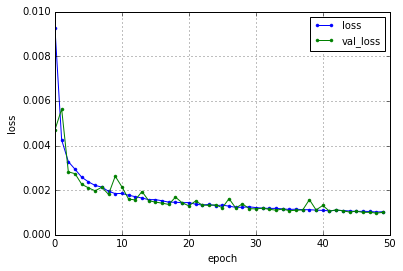

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0291 - val_loss: 0.0161
Epoch 2/50
0s - loss: 0.0158 - val_loss: 0.0097
Epoch 3/50
0s - loss: 0.0138 - val_loss: 0.0105
Epoch 4/50
0s - loss: 0.0126 - val_loss: 0.0093
Epoch 5/50
0s - loss: 0.0117 - val_loss: 0.0080
Epoch 6/50
0s - loss: 0.0110 - val_loss: 0.0066
Epoch 7/50
0s - loss: 0.0105 - val_loss: 0.0071
Epoch 8/50
0s - loss: 0.0099 - val_loss: 0.0067
Epoch 9/50
0s - loss: 0.0096 - val_loss: 0.0110
Epoch 10/50
0s - loss: 0.0092 - val_loss: 0.0058
Epoch 11/50
0s - loss: 0.0090 - val_loss: 0.0060
Epoch 12/50
0s - loss: 0.0087 - val_loss: 0.0060
Epoch 13/50
0s - loss: 0.0086 - val_loss: 0.0121
Epoch 14/50
0s - loss: 0.0085 - val_loss: 0.0070
Epoch 15/50
0s - loss: 0.0083 - val_loss: 0.0076
Epoch 16/50
0s - loss: 0.0082 - val_loss: 0.0076


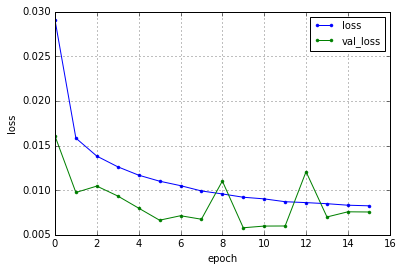

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0511 - val_loss: 0.0309
Epoch 2/50
0s - loss: 0.0243 - val_loss: 0.0208
Epoch 3/50
0s - loss: 0.0218 - val_loss: 0.0447
Epoch 4/50
0s - loss: 0.0206 - val_loss: 0.0135
Epoch 5/50
0s - loss: 0.0197 - val_loss: 0.0165
Epoch 6/50
0s - loss: 0.0192 - val_loss: 0.0194
Epoch 7/50
0s - loss: 0.0185 - val_loss: 0.0108
Epoch 8/50
0s - loss: 0.0178 - val_loss: 0.0116
Epoch 9/50
0s - loss: 0.0173 - val_loss: 0.0176
Epoch 10/50
0s - loss: 0.0166 - val_loss: 0.0216
Epoch 11/50
0s - loss: 0.0161 - val_loss: 0.0116
Epoch 12/50
0s - loss: 0.0156 - val_loss: 0.0092
Epoch 13/50
0s - loss: 0.0153 - val_loss: 0.0085
Epoch 14/50
0s - loss: 0.0149 - val_loss: 0.0132
Epoch 15/50
0s - loss: 0.0146 - val_loss: 0.0134
Epoch 16/50
0s - loss: 0.0143 - val_loss: 0.0139
Epoch 17/50
0s - loss: 0.0140 - val_loss: 0.0203
Epoch 18/50
0s - loss: 0.0137 - val_loss: 0.0082
Epoch 19/50
0s - loss: 0.0134 - val_loss: 0.0124
Epoch 20/50


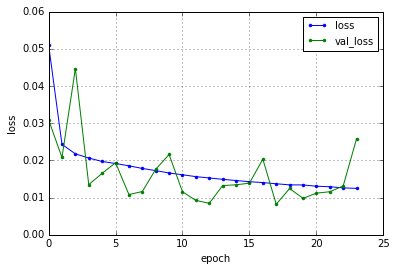

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0100 - val_loss: 0.0043
Epoch 2/50
0s - loss: 0.0053 - val_loss: 0.0032
Epoch 3/50
0s - loss: 0.0048 - val_loss: 0.0031
Epoch 4/50
0s - loss: 0.0046 - val_loss: 0.0036
Epoch 5/50
0s - loss: 0.0044 - val_loss: 0.0031
Epoch 6/50
0s - loss: 0.0044 - val_loss: 0.0072
Epoch 7/50
0s - loss: 0.0043 - val_loss: 0.0035
Epoch 8/50
0s - loss: 0.0043 - val_loss: 0.0040
Epoch 9/50
0s - loss: 0.0042 - val_loss: 0.0024
Epoch 10/50
0s - loss: 0.0042 - val_loss: 0.0041
Epoch 11/50
0s - loss: 0.0041 - val_loss: 0.0077
Epoch 12/50
0s - loss: 0.0041 - val_loss: 0.0074
Epoch 13/50
0s - loss: 0.0041 - val_loss: 0.0044
Epoch 14/50
0s - loss: 0.0040 - val_loss: 0.0032
Epoch 15/50
0s - loss: 0.0039 - val_loss: 0.0074


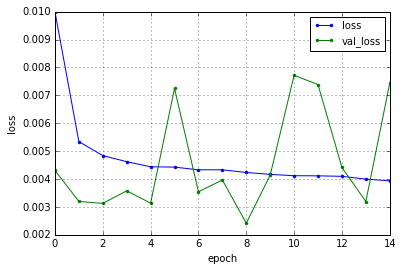

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0293 - val_loss: 0.0126
Epoch 2/50
0s - loss: 0.0157 - val_loss: 0.0102
Epoch 3/50
0s - loss: 0.0122 - val_loss: 0.0097
Epoch 4/50
0s - loss: 0.0109 - val_loss: 0.0120
Epoch 5/50
0s - loss: 0.0090 - val_loss: 0.0054
Epoch 6/50
0s - loss: 0.0082 - val_loss: 0.0101
Epoch 7/50
0s - loss: 0.0071 - val_loss: 0.0214
Epoch 8/50
0s - loss: 0.0068 - val_loss: 0.0082
Epoch 9/50
0s - loss: 0.0066 - val_loss: 0.0047
Epoch 10/50
0s - loss: 0.0061 - val_loss: 0.0035
Epoch 11/50
0s - loss: 0.0059 - val_loss: 0.0128
Epoch 12/50
0s - loss: 0.0058 - val_loss: 0.0085
Epoch 13/50
0s - loss: 0.0059 - val_loss: 0.0039
Epoch 14/50
0s - loss: 0.0055 - val_loss: 0.0156
Epoch 15/50
0s - loss: 0.0051 - val_loss: 0.0132
Epoch 16/50
0s - loss: 0.0049 - val_loss: 0.0066


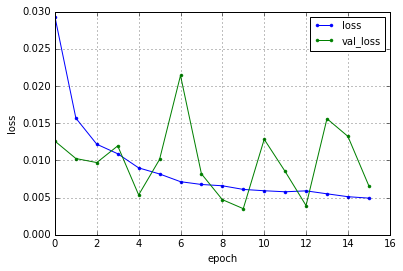

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0524 - val_loss: 0.0212
Epoch 2/50
0s - loss: 0.0264 - val_loss: 0.0182
Epoch 3/50
0s - loss: 0.0211 - val_loss: 0.0191
Epoch 4/50
1s - loss: 0.0213 - val_loss: 0.0239
Epoch 5/50
1s - loss: 0.0164 - val_loss: 0.0217
Epoch 6/50
0s - loss: 0.0141 - val_loss: 0.0386
Epoch 7/50
0s - loss: 0.0131 - val_loss: 0.0088
Epoch 8/50
0s - loss: 0.0114 - val_loss: 0.0134
Epoch 9/50
0s - loss: 0.0106 - val_loss: 0.0090
Epoch 10/50
0s - loss: 0.0098 - val_loss: 0.0068
Epoch 11/50
0s - loss: 0.0094 - val_loss: 0.0087
Epoch 12/50
0s - loss: 0.0086 - val_loss: 0.0060
Epoch 13/50
0s - loss: 0.0082 - val_loss: 0.0049
Epoch 14/50
0s - loss: 0.0080 - val_loss: 0.0058
Epoch 15/50
0s - loss: 0.0076 - val_loss: 0.0050
Epoch 16/50
0s - loss: 0.0070 - val_loss: 0.0079
Epoch 17/50
0s - loss: 0.0063 - val_loss: 0.0037
Epoch 18/50
0s - loss: 0.0057 - val_loss: 0.0029
Epoch 19/50
0s - loss: 0.0053 - val_loss: 0.0042
Epoch 20/50


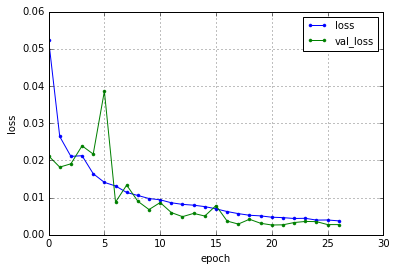

hiden node = 32
Train on 15890 samples, validate on 15890 samples
Epoch 1/50
0s - loss: 0.0099 - val_loss: 0.0046
Epoch 2/50
0s - loss: 0.0058 - val_loss: 0.0031
Epoch 3/50
0s - loss: 0.0048 - val_loss: 0.0040
Epoch 4/50
0s - loss: 0.0048 - val_loss: 0.0030
Epoch 5/50
0s - loss: 0.0042 - val_loss: 0.0027
Epoch 6/50
0s - loss: 0.0040 - val_loss: 0.0053
Epoch 7/50
0s - loss: 0.0037 - val_loss: 0.0082
Epoch 8/50
0s - loss: 0.0033 - val_loss: 0.0021
Epoch 9/50
0s - loss: 0.0030 - val_loss: 0.0018
Epoch 10/50
0s - loss: 0.0028 - val_loss: 0.0026
Epoch 11/50
0s - loss: 0.0021 - val_loss: 0.0130
Epoch 12/50
0s - loss: 0.0022 - val_loss: 0.0017
Epoch 13/50
0s - loss: 0.0018 - val_loss: 0.0034
Epoch 14/50
0s - loss: 0.0017 - val_loss: 0.0015
Epoch 15/50
0s - loss: 0.0018 - val_loss: 0.0011
Epoch 16/50
0s - loss: 0.0018 - val_loss: 0.0012
Epoch 17/50
0s - loss: 0.0015 - val_loss: 0.0011
Epoch 18/50
0s - loss: 0.0016 - val_loss: 0.0021
Epoch 19/50
0s - loss: 0.0018 - val_loss: 0.0024
Epoch 20/50


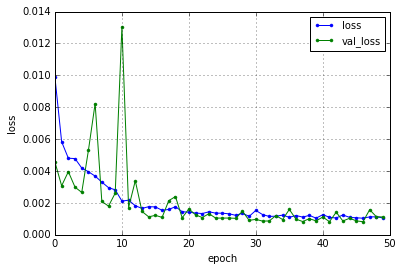

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15858
SourceData's aborting data = 6
window shape is (15858, 1024, 3)
(15858, 1024, 3)
hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.2914 - val_loss: 0.2721
Epoch 2/50
1s - loss: 0.2515 - val_loss: 0.2301
Epoch 3/50
1s - loss: 0.2095 - val_loss: 0.1900
Epoch 4/50
1s - loss: 0.1732 - val_loss: 0.1577
Epoch 5/50
1s - loss: 0.1449 - val_loss: 0.1332
Epoch 6/50
1s - loss: 0.1237 - val_loss: 0.1151
Epoch 7/50
1s - loss: 0.1080 - val_loss: 0.1015
Epoch 8/50
1s - loss: 0.0961 - val_loss: 0.0910
Epoch 9/50
1s - loss: 0.0868 - val_loss: 0.0828
Epoch 10/50
1s - loss: 0.0794 - val_loss: 0.0762
Epoch 11/50
1s - loss: 0.0735 - val_loss: 0.0709
Epoch 12/50
1s - loss: 0.0687 - val_loss: 0.0665
Epoch 13/50
1s - loss: 0.0647 - val_loss: 0.0629
Epoch 14/50
1s - loss: 0.0614 - val_loss: 0.0599
Epoch 15/50
1s - loss: 0.0586 - val_loss: 0.0574
Epoch 16/50
1

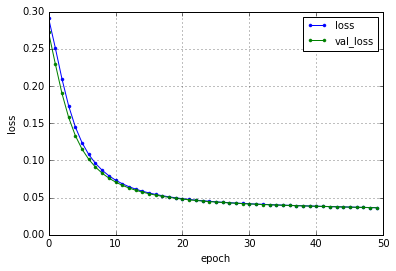

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.6471 - val_loss: 0.5310
Epoch 2/50
1s - loss: 0.4304 - val_loss: 0.3437
Epoch 3/50
1s - loss: 0.2831 - val_loss: 0.2325
Epoch 4/50
1s - loss: 0.1976 - val_loss: 0.1682
Epoch 5/50
1s - loss: 0.1475 - val_loss: 0.1297
Epoch 6/50
1s - loss: 0.1167 - val_loss: 0.1054
Epoch 7/50
1s - loss: 0.0970 - val_loss: 0.0896
Epoch 8/50
1s - loss: 0.0840 - val_loss: 0.0791
Epoch 9/50
1s - loss: 0.0752 - val_loss: 0.0718
Epoch 10/50
1s - loss: 0.0690 - val_loss: 0.0665
Epoch 11/50
1s - loss: 0.0645 - val_loss: 0.0627
Epoch 12/50
1s - loss: 0.0612 - val_loss: 0.0597
Epoch 13/50
1s - loss: 0.0586 - val_loss: 0.0575
Epoch 14/50
1s - loss: 0.0565 - val_loss: 0.0556
Epoch 15/50
1s - loss: 0.0548 - val_loss: 0.0541
Epoch 16/50
1s - loss: 0.0535 - val_loss: 0.0528
Epoch 17/50
1s - loss: 0.0523 - val_loss: 0.0518
Epoch 18/50
1s - loss: 0.0513 - val_loss: 0.0508
Epoch 19/50
1s - loss: 0.0504 - val_loss: 0.0500
Epoch 20/50


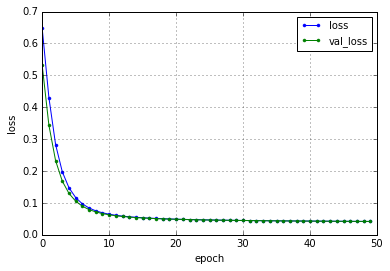

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0853 - val_loss: 0.0832
Epoch 2/50
1s - loss: 0.0819 - val_loss: 0.0808
Epoch 3/50
1s - loss: 0.0799 - val_loss: 0.0791
Epoch 4/50
1s - loss: 0.0782 - val_loss: 0.0772
Epoch 5/50
1s - loss: 0.0761 - val_loss: 0.0750
Epoch 6/50
1s - loss: 0.0737 - val_loss: 0.0724
Epoch 7/50
1s - loss: 0.0710 - val_loss: 0.0696
Epoch 8/50
1s - loss: 0.0681 - val_loss: 0.0666
Epoch 9/50
1s - loss: 0.0650 - val_loss: 0.0634
Epoch 10/50
1s - loss: 0.0619 - val_loss: 0.0603
Epoch 11/50
1s - loss: 0.0588 - val_loss: 0.0572
Epoch 12/50
1s - loss: 0.0558 - val_loss: 0.0543
Epoch 13/50
1s - loss: 0.0530 - val_loss: 0.0517
Epoch 14/50
1s - loss: 0.0504 - val_loss: 0.0492
Epoch 15/50
1s - loss: 0.0481 - val_loss: 0.0470
Epoch 16/50
1s - loss: 0.0460 - val_loss: 0.0451
Epoch 17/50
1s - loss: 0.0442 - val_loss: 0.0433
Epoch 18/50
2s - loss: 0.0426 - val_loss: 0.0418
Epoch 19/50
1s - loss: 0.0411 - val_loss: 0.0405
Epoch 20/50


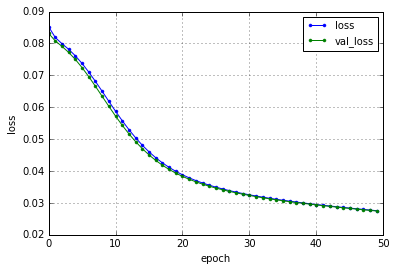

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0573 - val_loss: 0.0314
Epoch 2/50
1s - loss: 0.0288 - val_loss: 0.0251
Epoch 3/50
1s - loss: 0.0245 - val_loss: 0.0218
Epoch 4/50
1s - loss: 0.0223 - val_loss: 0.0217
Epoch 5/50
1s - loss: 0.0203 - val_loss: 0.0174
Epoch 6/50
1s - loss: 0.0189 - val_loss: 0.0171
Epoch 7/50
1s - loss: 0.0183 - val_loss: 0.0281
Epoch 8/50
1s - loss: 0.0176 - val_loss: 0.0213
Epoch 9/50
1s - loss: 0.0168 - val_loss: 0.0201
Epoch 10/50
1s - loss: 0.0162 - val_loss: 0.0135
Epoch 11/50
1s - loss: 0.0158 - val_loss: 0.0130
Epoch 12/50
1s - loss: 0.0158 - val_loss: 0.0167
Epoch 13/50
1s - loss: 0.0152 - val_loss: 0.0198
Epoch 14/50
1s - loss: 0.0145 - val_loss: 0.0207
Epoch 15/50
1s - loss: 0.0144 - val_loss: 0.0115
Epoch 16/50
1s - loss: 0.0138 - val_loss: 0.0204
Epoch 17/50
1s - loss: 0.0138 - val_loss: 0.0119
Epoch 18/50
1s - loss: 0.0133 - val_loss: 0.0124
Epoch 19/50
1s - loss: 0.0132 - val_loss: 0.0116
Epoch 20/50


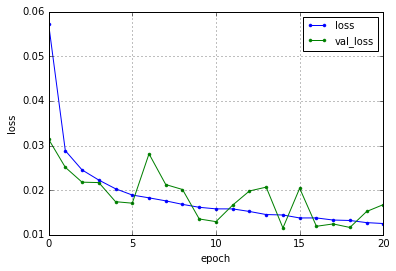

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0927 - val_loss: 0.0414
Epoch 2/50
1s - loss: 0.0427 - val_loss: 0.0423
Epoch 3/50
1s - loss: 0.0372 - val_loss: 0.0315
Epoch 4/50
1s - loss: 0.0311 - val_loss: 0.0270
Epoch 5/50
1s - loss: 0.0276 - val_loss: 0.0275
Epoch 6/50
1s - loss: 0.0258 - val_loss: 0.0253
Epoch 7/50
1s - loss: 0.0243 - val_loss: 0.0192
Epoch 8/50
1s - loss: 0.0230 - val_loss: 0.0208
Epoch 9/50
1s - loss: 0.0222 - val_loss: 0.0180
Epoch 10/50
1s - loss: 0.0213 - val_loss: 0.0211
Epoch 11/50
1s - loss: 0.0212 - val_loss: 0.0170
Epoch 12/50
1s - loss: 0.0203 - val_loss: 0.0154
Epoch 13/50
1s - loss: 0.0195 - val_loss: 0.0186
Epoch 14/50
1s - loss: 0.0191 - val_loss: 0.0191
Epoch 15/50
1s - loss: 0.0187 - val_loss: 0.0181
Epoch 16/50
1s - loss: 0.0185 - val_loss: 0.0252
Epoch 17/50
1s - loss: 0.0181 - val_loss: 0.0211
Epoch 18/50
1s - loss: 0.0180 - val_loss: 0.0136
Epoch 19/50
1s - loss: 0.0177 - val_loss: 0.0136
Epoch 20/50


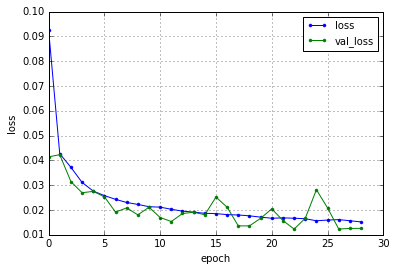

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0340 - val_loss: 0.0199
Epoch 2/50
1s - loss: 0.0167 - val_loss: 0.0144
Epoch 3/50
1s - loss: 0.0130 - val_loss: 0.0117
Epoch 4/50
1s - loss: 0.0109 - val_loss: 0.0101
Epoch 5/50
1s - loss: 0.0096 - val_loss: 0.0091
Epoch 6/50
1s - loss: 0.0087 - val_loss: 0.0082
Epoch 7/50
1s - loss: 0.0081 - val_loss: 0.0079
Epoch 8/50
1s - loss: 0.0075 - val_loss: 0.0072
Epoch 9/50
1s - loss: 0.0071 - val_loss: 0.0067
Epoch 10/50
1s - loss: 0.0068 - val_loss: 0.0062
Epoch 11/50
1s - loss: 0.0065 - val_loss: 0.0073
Epoch 12/50
1s - loss: 0.0062 - val_loss: 0.0062
Epoch 13/50
1s - loss: 0.0060 - val_loss: 0.0058
Epoch 14/50
1s - loss: 0.0058 - val_loss: 0.0055
Epoch 15/50
1s - loss: 0.0056 - val_loss: 0.0051
Epoch 16/50
1s - loss: 0.0055 - val_loss: 0.0072
Epoch 17/50
1s - loss: 0.0053 - val_loss: 0.0065
Epoch 18/50
1s - loss: 0.0052 - val_loss: 0.0052
Epoch 19/50
1s - loss: 0.0051 - val_loss: 0.0057
Epoch 20/50


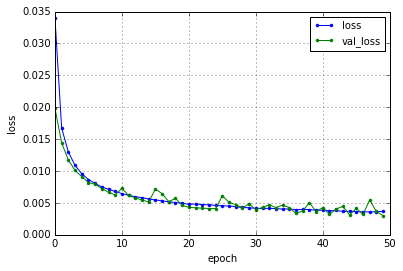

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0336 - val_loss: 0.0180
Epoch 2/50
1s - loss: 0.0147 - val_loss: 0.0115
Epoch 3/50
1s - loss: 0.0106 - val_loss: 0.0088
Epoch 4/50
1s - loss: 0.0083 - val_loss: 0.0100
Epoch 5/50
1s - loss: 0.0070 - val_loss: 0.0060
Epoch 6/50
1s - loss: 0.0058 - val_loss: 0.0069
Epoch 7/50
1s - loss: 0.0053 - val_loss: 0.0045
Epoch 8/50
1s - loss: 0.0047 - val_loss: 0.0042
Epoch 9/50
1s - loss: 0.0048 - val_loss: 0.0046
Epoch 10/50
1s - loss: 0.0043 - val_loss: 0.0046
Epoch 11/50
1s - loss: 0.0043 - val_loss: 0.0037
Epoch 12/50
1s - loss: 0.0041 - val_loss: 0.0039
Epoch 13/50
1s - loss: 0.0040 - val_loss: 0.0041
Epoch 14/50
1s - loss: 0.0039 - val_loss: 0.0035
Epoch 15/50
1s - loss: 0.0039 - val_loss: 0.0035
Epoch 16/50
1s - loss: 0.0040 - val_loss: 0.0049
Epoch 17/50
1s - loss: 0.0038 - val_loss: 0.0036
Epoch 18/50
1s - loss: 0.0034 - val_loss: 0.0032
Epoch 19/50
1s - loss: 0.0035 - val_loss: 0.0041
Epoch 20/50


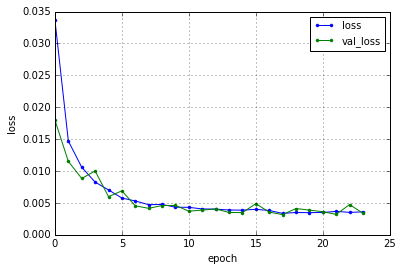

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0602 - val_loss: 0.0339
Epoch 2/50
1s - loss: 0.0248 - val_loss: 0.0210
Epoch 3/50
1s - loss: 0.0162 - val_loss: 0.0146
Epoch 4/50
1s - loss: 0.0117 - val_loss: 0.0107
Epoch 5/50
1s - loss: 0.0087 - val_loss: 0.0070
Epoch 6/50
1s - loss: 0.0069 - val_loss: 0.0055
Epoch 7/50
1s - loss: 0.0057 - val_loss: 0.0086
Epoch 8/50
1s - loss: 0.0051 - val_loss: 0.0040
Epoch 9/50
1s - loss: 0.0047 - val_loss: 0.0042
Epoch 10/50
1s - loss: 0.0042 - val_loss: 0.0060
Epoch 11/50
1s - loss: 0.0039 - val_loss: 0.0039
Epoch 12/50
1s - loss: 0.0036 - val_loss: 0.0030
Epoch 13/50
1s - loss: 0.0037 - val_loss: 0.0031
Epoch 14/50
1s - loss: 0.0033 - val_loss: 0.0047
Epoch 15/50
1s - loss: 0.0032 - val_loss: 0.0025
Epoch 16/50
1s - loss: 0.0033 - val_loss: 0.0024
Epoch 17/50
1s - loss: 0.0036 - val_loss: 0.0027
Epoch 18/50
1s - loss: 0.0030 - val_loss: 0.0029
Epoch 19/50
1s - loss: 0.0030 - val_loss: 0.0039
Epoch 20/50


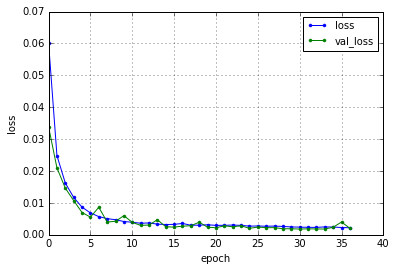

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0135 - val_loss: 0.0065
Epoch 2/50
1s - loss: 0.0053 - val_loss: 0.0040
Epoch 3/50
1s - loss: 0.0039 - val_loss: 0.0036
Epoch 4/50
1s - loss: 0.0033 - val_loss: 0.0033
Epoch 5/50
1s - loss: 0.0027 - val_loss: 0.0025
Epoch 6/50
1s - loss: 0.0024 - val_loss: 0.0026
Epoch 7/50
1s - loss: 0.0023 - val_loss: 0.0020
Epoch 8/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 9/50
1s - loss: 0.0021 - val_loss: 0.0037
Epoch 10/50
1s - loss: 0.0020 - val_loss: 0.0017
Epoch 11/50
1s - loss: 0.0019 - val_loss: 0.0021
Epoch 12/50
1s - loss: 0.0018 - val_loss: 0.0021
Epoch 13/50
1s - loss: 0.0019 - val_loss: 0.0023
Epoch 14/50
1s - loss: 0.0018 - val_loss: 0.0016
Epoch 15/50
1s - loss: 0.0019 - val_loss: 0.0016
Epoch 16/50
1s - loss: 0.0018 - val_loss: 0.0018
Epoch 17/50
1s - loss: 0.0017 - val_loss: 0.0014
Epoch 18/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 19/50
1s - loss: 0.0016 - val_loss: 0.0026
Epoch 20/50


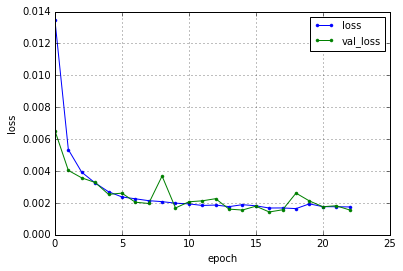

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0325 - val_loss: 0.0180
Epoch 2/50
1s - loss: 0.0124 - val_loss: 0.0114
Epoch 3/50
1s - loss: 0.0089 - val_loss: 0.0074
Epoch 4/50
1s - loss: 0.0078 - val_loss: 0.0141
Epoch 5/50
1s - loss: 0.0068 - val_loss: 0.0056
Epoch 6/50
1s - loss: 0.0059 - val_loss: 0.0049
Epoch 7/50
1s - loss: 0.0058 - val_loss: 0.0044
Epoch 8/50
1s - loss: 0.0056 - val_loss: 0.0047
Epoch 9/50
1s - loss: 0.0051 - val_loss: 0.0065
Epoch 10/50
1s - loss: 0.0045 - val_loss: 0.0047
Epoch 11/50
1s - loss: 0.0048 - val_loss: 0.0040
Epoch 12/50
1s - loss: 0.0046 - val_loss: 0.0057
Epoch 13/50
1s - loss: 0.0045 - val_loss: 0.0046
Epoch 14/50
1s - loss: 0.0044 - val_loss: 0.0039
Epoch 15/50
1s - loss: 0.0041 - val_loss: 0.0033
Epoch 16/50
1s - loss: 0.0048 - val_loss: 0.0037
Epoch 17/50
1s - loss: 0.0042 - val_loss: 0.0041
Epoch 18/50
1s - loss: 0.0042 - val_loss: 0.0087
Epoch 19/50
1s - loss: 0.0043 - val_loss: 0.0041
Epoch 20/50


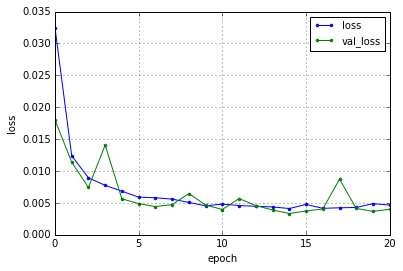

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0594 - val_loss: 0.0214
Epoch 2/50
1s - loss: 0.0174 - val_loss: 0.0122
Epoch 3/50
1s - loss: 0.0121 - val_loss: 0.0089
Epoch 4/50
1s - loss: 0.0091 - val_loss: 0.0096
Epoch 5/50
1s - loss: 0.0074 - val_loss: 0.0116
Epoch 6/50
1s - loss: 0.0065 - val_loss: 0.0070
Epoch 7/50
1s - loss: 0.0061 - val_loss: 0.0096
Epoch 8/50
1s - loss: 0.0054 - val_loss: 0.0042
Epoch 9/50
1s - loss: 0.0055 - val_loss: 0.0058
Epoch 10/50
1s - loss: 0.0049 - val_loss: 0.0052
Epoch 11/50
1s - loss: 0.0045 - val_loss: 0.0043
Epoch 12/50
1s - loss: 0.0043 - val_loss: 0.0038
Epoch 13/50
1s - loss: 0.0040 - val_loss: 0.0064
Epoch 14/50
1s - loss: 0.0042 - val_loss: 0.0030
Epoch 15/50
1s - loss: 0.0049 - val_loss: 0.0053
Epoch 16/50
1s - loss: 0.0037 - val_loss: 0.0035
Epoch 17/50
1s - loss: 0.0039 - val_loss: 0.0130
Epoch 18/50
1s - loss: 0.0037 - val_loss: 0.0032
Epoch 19/50
1s - loss: 0.0040 - val_loss: 0.0029
Epoch 20/50


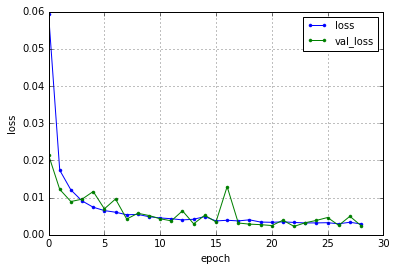

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0116 - val_loss: 0.0056
Epoch 2/50
1s - loss: 0.0045 - val_loss: 0.0051
Epoch 3/50
1s - loss: 0.0039 - val_loss: 0.0032
Epoch 4/50
1s - loss: 0.0030 - val_loss: 0.0071
Epoch 5/50
1s - loss: 0.0029 - val_loss: 0.0025
Epoch 6/50
1s - loss: 0.0031 - val_loss: 0.0025
Epoch 7/50
1s - loss: 0.0028 - val_loss: 0.0020
Epoch 8/50
1s - loss: 0.0024 - val_loss: 0.0027
Epoch 9/50
1s - loss: 0.0028 - val_loss: 0.0019
Epoch 10/50
1s - loss: 0.0022 - val_loss: 0.0022
Epoch 11/50
1s - loss: 0.0028 - val_loss: 0.0019
Epoch 12/50
1s - loss: 0.0024 - val_loss: 0.0017
Epoch 13/50
1s - loss: 0.0024 - val_loss: 0.0018
Epoch 14/50
1s - loss: 0.0025 - val_loss: 0.0027
Epoch 15/50
1s - loss: 0.0024 - val_loss: 0.0037
Epoch 16/50
1s - loss: 0.0024 - val_loss: 0.0020
Epoch 17/50
1s - loss: 0.0028 - val_loss: 0.0052
Epoch 18/50
1s - loss: 0.0024 - val_loss: 0.0017
Epoch 19/50
1s - loss: 0.0023 - val_loss: 0.0029
Epoch 20/50


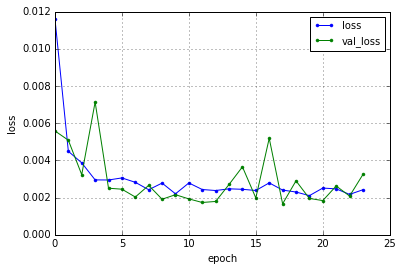

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0360 - val_loss: 0.0217
Epoch 2/50
1s - loss: 0.0193 - val_loss: 0.0148
Epoch 3/50
1s - loss: 0.0155 - val_loss: 0.0124
Epoch 4/50
1s - loss: 0.0132 - val_loss: 0.0123
Epoch 5/50
1s - loss: 0.0119 - val_loss: 0.0098
Epoch 6/50
1s - loss: 0.0106 - val_loss: 0.0094
Epoch 7/50
1s - loss: 0.0097 - val_loss: 0.0087
Epoch 8/50
1s - loss: 0.0091 - val_loss: 0.0248
Epoch 9/50
1s - loss: 0.0086 - val_loss: 0.0081
Epoch 10/50
1s - loss: 0.0082 - val_loss: 0.0071
Epoch 11/50
1s - loss: 0.0079 - val_loss: 0.0069
Epoch 12/50
1s - loss: 0.0075 - val_loss: 0.0088
Epoch 13/50
1s - loss: 0.0072 - val_loss: 0.0064
Epoch 14/50
1s - loss: 0.0071 - val_loss: 0.0064
Epoch 15/50
1s - loss: 0.0069 - val_loss: 0.0061
Epoch 16/50
1s - loss: 0.0065 - val_loss: 0.0060
Epoch 17/50
1s - loss: 0.0066 - val_loss: 0.0059
Epoch 18/50
1s - loss: 0.0063 - val_loss: 0.0060
Epoch 19/50
1s - loss: 0.0061 - val_loss: 0.0055
Epoch 20/50


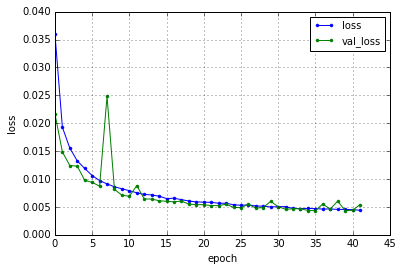

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0607 - val_loss: 0.0338
Epoch 2/50
1s - loss: 0.0318 - val_loss: 0.0244
Epoch 3/50
1s - loss: 0.0239 - val_loss: 0.0428
Epoch 4/50
1s - loss: 0.0209 - val_loss: 0.0183
Epoch 5/50
1s - loss: 0.0184 - val_loss: 0.0191
Epoch 6/50
1s - loss: 0.0166 - val_loss: 0.0151
Epoch 7/50
1s - loss: 0.0153 - val_loss: 0.0132
Epoch 8/50
1s - loss: 0.0142 - val_loss: 0.0165
Epoch 9/50
1s - loss: 0.0130 - val_loss: 0.0124
Epoch 10/50
1s - loss: 0.0124 - val_loss: 0.0113
Epoch 11/50
1s - loss: 0.0117 - val_loss: 0.0102
Epoch 12/50
1s - loss: 0.0111 - val_loss: 0.0090
Epoch 13/50
1s - loss: 0.0105 - val_loss: 0.0116
Epoch 14/50
1s - loss: 0.0100 - val_loss: 0.0090
Epoch 15/50
1s - loss: 0.0097 - val_loss: 0.0079
Epoch 16/50
1s - loss: 0.0089 - val_loss: 0.0107
Epoch 17/50
1s - loss: 0.0089 - val_loss: 0.0133
Epoch 18/50
1s - loss: 0.0085 - val_loss: 0.0072
Epoch 19/50
1s - loss: 0.0084 - val_loss: 0.0099
Epoch 20/50


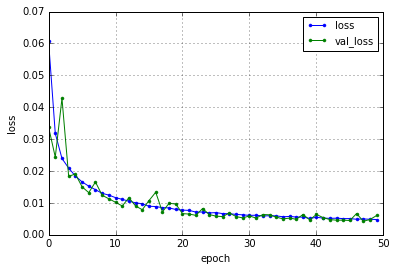

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0133 - val_loss: 0.0067
Epoch 2/50
1s - loss: 0.0065 - val_loss: 0.0074
Epoch 3/50
1s - loss: 0.0053 - val_loss: 0.0045
Epoch 4/50
1s - loss: 0.0046 - val_loss: 0.0038
Epoch 5/50
1s - loss: 0.0042 - val_loss: 0.0037
Epoch 6/50
1s - loss: 0.0039 - val_loss: 0.0033
Epoch 7/50
1s - loss: 0.0035 - val_loss: 0.0031
Epoch 8/50
1s - loss: 0.0033 - val_loss: 0.0033
Epoch 9/50
1s - loss: 0.0031 - val_loss: 0.0027
Epoch 10/50
1s - loss: 0.0031 - val_loss: 0.0026
Epoch 11/50
1s - loss: 0.0029 - val_loss: 0.0027
Epoch 12/50
1s - loss: 0.0027 - val_loss: 0.0025
Epoch 13/50
1s - loss: 0.0027 - val_loss: 0.0037
Epoch 14/50
1s - loss: 0.0026 - val_loss: 0.0023
Epoch 15/50
1s - loss: 0.0025 - val_loss: 0.0025
Epoch 16/50
1s - loss: 0.0025 - val_loss: 0.0023
Epoch 17/50
1s - loss: 0.0024 - val_loss: 0.0022
Epoch 18/50
1s - loss: 0.0023 - val_loss: 0.0021
Epoch 19/50
1s - loss: 0.0023 - val_loss: 0.0021
Epoch 20/50


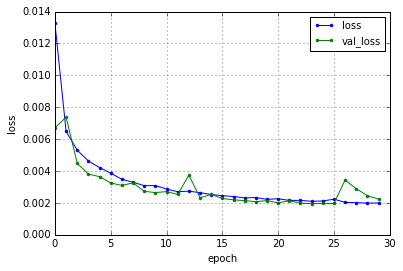

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0408 - val_loss: 0.0369
Epoch 2/50
1s - loss: 0.0259 - val_loss: 0.0235
Epoch 3/50
1s - loss: 0.0227 - val_loss: 0.0218
Epoch 4/50
1s - loss: 0.0208 - val_loss: 0.0174
Epoch 5/50
1s - loss: 0.0196 - val_loss: 0.0146
Epoch 6/50
1s - loss: 0.0182 - val_loss: 0.0211
Epoch 7/50
1s - loss: 0.0175 - val_loss: 0.0611
Epoch 8/50
1s - loss: 0.0171 - val_loss: 0.0450
Epoch 9/50
1s - loss: 0.0166 - val_loss: 0.0109
Epoch 10/50
1s - loss: 0.0159 - val_loss: 0.0108
Epoch 11/50
1s - loss: 0.0156 - val_loss: 0.0181
Epoch 12/50
1s - loss: 0.0154 - val_loss: 0.0118
Epoch 13/50
1s - loss: 0.0152 - val_loss: 0.0171
Epoch 14/50
1s - loss: 0.0149 - val_loss: 0.0118
Epoch 15/50
1s - loss: 0.0146 - val_loss: 0.0110
Epoch 16/50
1s - loss: 0.0145 - val_loss: 0.0096
Epoch 17/50
1s - loss: 0.0146 - val_loss: 0.0121
Epoch 18/50
1s - loss: 0.0142 - val_loss: 0.0113
Epoch 19/50
1s - loss: 0.0142 - val_loss: 0.0093
Epoch 20/50


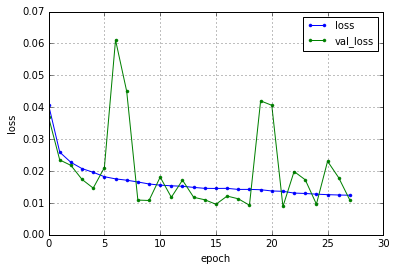

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0709 - val_loss: 0.0358
Epoch 2/50
1s - loss: 0.0395 - val_loss: 0.0529
Epoch 3/50
1s - loss: 0.0356 - val_loss: 0.0383
Epoch 4/50
1s - loss: 0.0331 - val_loss: 0.0449
Epoch 5/50
1s - loss: 0.0313 - val_loss: 0.0242
Epoch 6/50
1s - loss: 0.0298 - val_loss: 0.0308
Epoch 7/50
1s - loss: 0.0283 - val_loss: 0.0252
Epoch 8/50
1s - loss: 0.0275 - val_loss: 0.0207
Epoch 9/50
1s - loss: 0.0259 - val_loss: 0.0219
Epoch 10/50
1s - loss: 0.0256 - val_loss: 0.0390
Epoch 11/50
1s - loss: 0.0245 - val_loss: 0.0182
Epoch 12/50
1s - loss: 0.0237 - val_loss: 0.0265
Epoch 13/50
1s - loss: 0.0230 - val_loss: 0.0308
Epoch 14/50
1s - loss: 0.0224 - val_loss: 0.0224
Epoch 15/50
1s - loss: 0.0216 - val_loss: 0.0182
Epoch 16/50
1s - loss: 0.0214 - val_loss: 0.0213
Epoch 17/50
1s - loss: 0.0206 - val_loss: 0.0159
Epoch 18/50
1s - loss: 0.0203 - val_loss: 0.0144
Epoch 19/50
1s - loss: 0.0199 - val_loss: 0.0172
Epoch 20/50


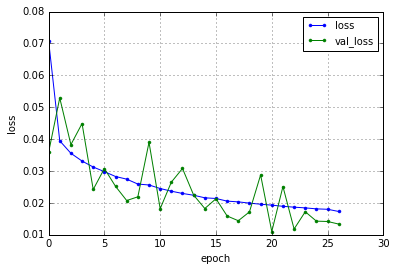

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0144 - val_loss: 0.0071
Epoch 2/50
1s - loss: 0.0090 - val_loss: 0.0057
Epoch 3/50
1s - loss: 0.0084 - val_loss: 0.0068
Epoch 4/50
1s - loss: 0.0080 - val_loss: 0.0054
Epoch 5/50
1s - loss: 0.0078 - val_loss: 0.0059
Epoch 6/50
1s - loss: 0.0076 - val_loss: 0.0106
Epoch 7/50
1s - loss: 0.0076 - val_loss: 0.0055
Epoch 8/50
1s - loss: 0.0076 - val_loss: 0.0052
Epoch 9/50
1s - loss: 0.0074 - val_loss: 0.0073
Epoch 10/50
1s - loss: 0.0073 - val_loss: 0.0044
Epoch 11/50
1s - loss: 0.0073 - val_loss: 0.0076
Epoch 12/50
1s - loss: 0.0072 - val_loss: 0.0057
Epoch 13/50
1s - loss: 0.0070 - val_loss: 0.0131
Epoch 14/50
1s - loss: 0.0070 - val_loss: 0.0038
Epoch 15/50
1s - loss: 0.0068 - val_loss: 0.0045
Epoch 16/50
1s - loss: 0.0065 - val_loss: 0.0060
Epoch 17/50
1s - loss: 0.0063 - val_loss: 0.0037
Epoch 18/50
1s - loss: 0.0060 - val_loss: 0.0062
Epoch 19/50
1s - loss: 0.0058 - val_loss: 0.0075
Epoch 20/50


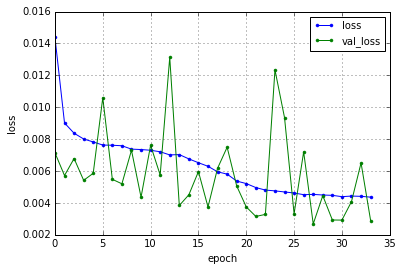

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0450 - val_loss: 0.0364
Epoch 2/50
1s - loss: 0.0285 - val_loss: 0.0280
Epoch 3/50
1s - loss: 0.0295 - val_loss: 0.0224
Epoch 4/50
1s - loss: 0.0249 - val_loss: 0.0450
Epoch 5/50
1s - loss: 0.0359 - val_loss: 0.0257
Epoch 6/50
1s - loss: 0.0277 - val_loss: 0.0298
Epoch 7/50
1s - loss: 0.0248 - val_loss: 0.0142
Epoch 8/50
1s - loss: 0.0234 - val_loss: 0.0143
Epoch 9/50
1s - loss: 0.0176 - val_loss: 0.0122
Epoch 10/50
1s - loss: 0.0173 - val_loss: 0.0148
Epoch 11/50
2s - loss: 0.0140 - val_loss: 0.0118
Epoch 12/50
2s - loss: 0.0129 - val_loss: 0.0156
Epoch 13/50
2s - loss: 0.0127 - val_loss: 0.0140
Epoch 14/50
2s - loss: 0.0118 - val_loss: 0.0084
Epoch 15/50
1s - loss: 0.0106 - val_loss: 0.0075
Epoch 16/50
2s - loss: 0.0101 - val_loss: 0.0089
Epoch 17/50
2s - loss: 0.0094 - val_loss: 0.0076
Epoch 18/50
1s - loss: 0.0096 - val_loss: 0.0072
Epoch 19/50
2s - loss: 0.0091 - val_loss: 0.0079
Epoch 20/50


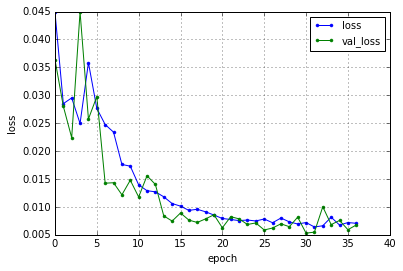

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0892 - val_loss: 0.0592
Epoch 2/50
2s - loss: 0.0600 - val_loss: 0.0561
Epoch 3/50
2s - loss: 0.0503 - val_loss: 0.0363
Epoch 4/50
1s - loss: 0.0501 - val_loss: 0.0499
Epoch 5/50
2s - loss: 0.0518 - val_loss: 0.0488
Epoch 6/50
2s - loss: 0.0462 - val_loss: 0.0494
Epoch 7/50
1s - loss: 0.0434 - val_loss: 0.0526
Epoch 8/50
2s - loss: 0.0453 - val_loss: 0.0356
Epoch 9/50
1s - loss: 0.0413 - val_loss: 0.0368
Epoch 10/50
2s - loss: 0.0337 - val_loss: 0.0794
Epoch 11/50
1s - loss: 0.0376 - val_loss: 0.0433
Epoch 12/50
2s - loss: 0.0343 - val_loss: 0.0323
Epoch 13/50
2s - loss: 0.0389 - val_loss: 0.0410
Epoch 14/50
2s - loss: 0.0300 - val_loss: 0.0261
Epoch 15/50
1s - loss: 0.0232 - val_loss: 0.0181
Epoch 16/50
2s - loss: 0.0204 - val_loss: 0.0304
Epoch 17/50
2s - loss: 0.0199 - val_loss: 0.0167
Epoch 18/50
2s - loss: 0.0232 - val_loss: 0.0203
Epoch 19/50
1s - loss: 0.0191 - val_loss: 0.0236
Epoch 20/50


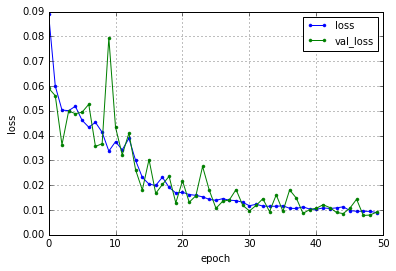

hiden node = 32
Train on 15858 samples, validate on 15858 samples
Epoch 1/50
1s - loss: 0.0168 - val_loss: 0.0080
Epoch 2/50
1s - loss: 0.0105 - val_loss: 0.0061
Epoch 3/50
1s - loss: 0.0088 - val_loss: 0.0065
Epoch 4/50
1s - loss: 0.0088 - val_loss: 0.0097
Epoch 5/50
2s - loss: 0.0083 - val_loss: 0.0048
Epoch 6/50
1s - loss: 0.0067 - val_loss: 0.0039
Epoch 7/50
1s - loss: 0.0069 - val_loss: 0.0042
Epoch 8/50
1s - loss: 0.0080 - val_loss: 0.0144
Epoch 9/50
1s - loss: 0.0067 - val_loss: 0.0039
Epoch 10/50
1s - loss: 0.0050 - val_loss: 0.0033
Epoch 11/50
1s - loss: 0.0048 - val_loss: 0.0047
Epoch 12/50
1s - loss: 0.0052 - val_loss: 0.0058
Epoch 13/50
1s - loss: 0.0039 - val_loss: 0.0103
Epoch 14/50
1s - loss: 0.0038 - val_loss: 0.0028
Epoch 15/50
1s - loss: 0.0036 - val_loss: 0.0037
Epoch 16/50
1s - loss: 0.0031 - val_loss: 0.0033
Epoch 17/50
1s - loss: 0.0030 - val_loss: 0.0022
Epoch 18/50
1s - loss: 0.0032 - val_loss: 0.0024
Epoch 19/50
1s - loss: 0.0028 - val_loss: 0.0034
Epoch 20/50


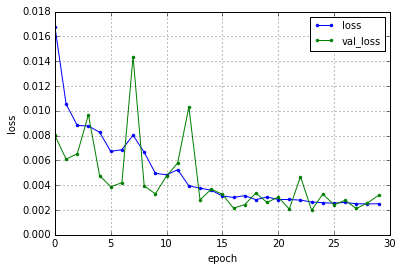

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15794
SourceData's aborting data = 6
window shape is (15794, 2048, 3)
(15794, 2048, 3)
hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
16s - loss: 0.2995 - val_loss: 0.2906
Epoch 2/50
15s - loss: 0.2803 - val_loss: 0.2692
Epoch 3/50
15s - loss: 0.2574 - val_loss: 0.2457
Epoch 4/50
15s - loss: 0.2345 - val_loss: 0.2236
Epoch 5/50
15s - loss: 0.2135 - val_loss: 0.2037
Epoch 6/50
15s - loss: 0.1948 - val_loss: 0.1862
Epoch 7/50
15s - loss: 0.1785 - val_loss: 0.1711
Epoch 8/50
15s - loss: 0.1644 - val_loss: 0.1580
Epoch 9/50
14s - loss: 0.1522 - val_loss: 0.1467
Epoch 10/50
15s - loss: 0.1418 - val_loss: 0.1371
Epoch 11/50
15s - loss: 0.1328 - val_loss: 0.1287
Epoch 12/50
15s - loss: 0.1250 - val_loss: 0.1214
Epoch 13/50
15s - loss: 0.1181 - val_loss: 0.1149
Epoch 14/50
14s - loss: 0.1120 - val_loss: 0.1092
Epoch 15/50
15s - loss: 0.1066 - val_loss: 0.104

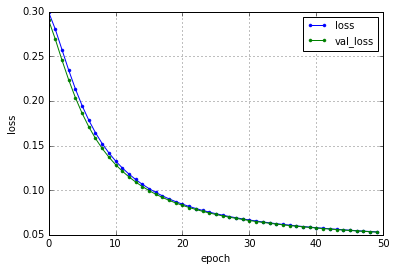

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
11s - loss: 0.7081 - val_loss: 0.6474
Epoch 2/50
11s - loss: 0.5826 - val_loss: 0.5208
Epoch 3/50
11s - loss: 0.4674 - val_loss: 0.4179
Epoch 4/50
11s - loss: 0.3768 - val_loss: 0.3392
Epoch 5/50
11s - loss: 0.3083 - val_loss: 0.2800
Epoch 6/50
11s - loss: 0.2566 - val_loss: 0.2351
Epoch 7/50
11s - loss: 0.2172 - val_loss: 0.2006
Epoch 8/50
11s - loss: 0.1867 - val_loss: 0.1738
Epoch 9/50
11s - loss: 0.1628 - val_loss: 0.1526
Epoch 10/50
11s - loss: 0.1440 - val_loss: 0.1359
Epoch 11/50
11s - loss: 0.1291 - val_loss: 0.1227
Epoch 12/50
11s - loss: 0.1172 - val_loss: 0.1121
Epoch 13/50
11s - loss: 0.1077 - val_loss: 0.1035
Epoch 14/50
12s - loss: 0.0999 - val_loss: 0.0965
Epoch 15/50
11s - loss: 0.0936 - val_loss: 0.0908
Epoch 16/50
11s - loss: 0.0884 - val_loss: 0.0861
Epoch 17/50
11s - loss: 0.0841 - val_loss: 0.0821
Epoch 18/50
11s - loss: 0.0804 - val_loss: 0.0788
Epoch 19/50
12s - loss: 0.0774 - val_loss: 

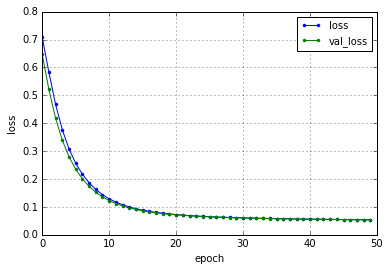

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0838 - val_loss: 0.0831
Epoch 2/50
3s - loss: 0.0826 - val_loss: 0.0823
Epoch 3/50
3s - loss: 0.0820 - val_loss: 0.0817
Epoch 4/50
3s - loss: 0.0814 - val_loss: 0.0810
Epoch 5/50
3s - loss: 0.0807 - val_loss: 0.0803
Epoch 6/50
3s - loss: 0.0799 - val_loss: 0.0795
Epoch 7/50
2s - loss: 0.0791 - val_loss: 0.0786
Epoch 8/50
2s - loss: 0.0781 - val_loss: 0.0775
Epoch 9/50
2s - loss: 0.0770 - val_loss: 0.0764
Epoch 10/50
2s - loss: 0.0757 - val_loss: 0.0751
Epoch 11/50
2s - loss: 0.0744 - val_loss: 0.0737
Epoch 12/50
2s - loss: 0.0730 - val_loss: 0.0723
Epoch 13/50
2s - loss: 0.0715 - val_loss: 0.0708
Epoch 14/50
2s - loss: 0.0700 - val_loss: 0.0692
Epoch 15/50
2s - loss: 0.0685 - val_loss: 0.0677
Epoch 16/50
2s - loss: 0.0669 - val_loss: 0.0661
Epoch 17/50
2s - loss: 0.0654 - val_loss: 0.0646
Epoch 18/50
2s - loss: 0.0639 - val_loss: 0.0631
Epoch 19/50
2s - loss: 0.0624 - val_loss: 0.0617
Epoch 20/50


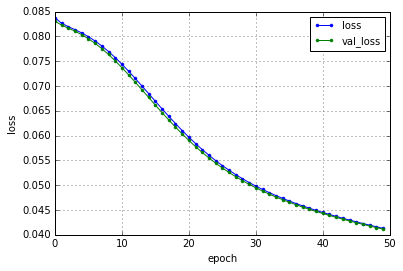

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0782 - val_loss: 0.0444
Epoch 2/50
2s - loss: 0.0399 - val_loss: 0.0353
Epoch 3/50
2s - loss: 0.0355 - val_loss: 0.0325
Epoch 4/50
2s - loss: 0.0330 - val_loss: 0.0289
Epoch 5/50
2s - loss: 0.0306 - val_loss: 0.0317
Epoch 6/50
2s - loss: 0.0291 - val_loss: 0.0264
Epoch 7/50
2s - loss: 0.0284 - val_loss: 0.0245
Epoch 8/50
2s - loss: 0.0271 - val_loss: 0.0246
Epoch 9/50
2s - loss: 0.0267 - val_loss: 0.0229
Epoch 10/50
2s - loss: 0.0257 - val_loss: 0.0224
Epoch 11/50
2s - loss: 0.0253 - val_loss: 0.0225
Epoch 12/50
2s - loss: 0.0246 - val_loss: 0.0209
Epoch 13/50
2s - loss: 0.0242 - val_loss: 0.0393
Epoch 14/50
2s - loss: 0.0238 - val_loss: 0.0210
Epoch 15/50
2s - loss: 0.0232 - val_loss: 0.0202
Epoch 16/50
2s - loss: 0.0234 - val_loss: 0.0202
Epoch 17/50
2s - loss: 0.0226 - val_loss: 0.0229
Epoch 18/50
2s - loss: 0.0219 - val_loss: 0.0196
Epoch 19/50
2s - loss: 0.0217 - val_loss: 0.0194
Epoch 20/50


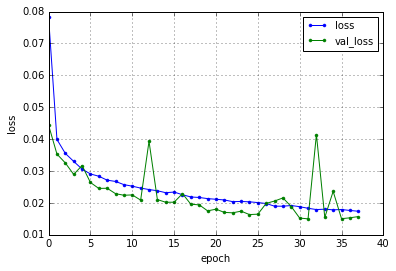

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.1090 - val_loss: 0.0590
Epoch 2/50
2s - loss: 0.0528 - val_loss: 0.0500
Epoch 3/50
2s - loss: 0.0486 - val_loss: 0.0477
Epoch 4/50
2s - loss: 0.0460 - val_loss: 0.0536
Epoch 5/50
2s - loss: 0.0450 - val_loss: 0.0407
Epoch 6/50
2s - loss: 0.0425 - val_loss: 0.0431
Epoch 7/50
2s - loss: 0.0397 - val_loss: 0.0332
Epoch 8/50
2s - loss: 0.0374 - val_loss: 0.0506
Epoch 9/50
2s - loss: 0.0353 - val_loss: 0.0315
Epoch 10/50
2s - loss: 0.0334 - val_loss: 0.0386
Epoch 11/50
2s - loss: 0.0326 - val_loss: 0.0335
Epoch 12/50
2s - loss: 0.0316 - val_loss: 0.0268
Epoch 13/50
2s - loss: 0.0301 - val_loss: 0.0320
Epoch 14/50
2s - loss: 0.0302 - val_loss: 0.0264
Epoch 15/50
2s - loss: 0.0290 - val_loss: 0.0358
Epoch 16/50
2s - loss: 0.0289 - val_loss: 0.0248
Epoch 17/50
2s - loss: 0.0277 - val_loss: 0.0232
Epoch 18/50
2s - loss: 0.0277 - val_loss: 0.0275
Epoch 19/50
2s - loss: 0.0268 - val_loss: 0.0268
Epoch 20/50


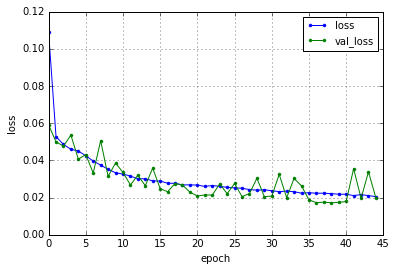

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0469 - val_loss: 0.0318
Epoch 2/50
2s - loss: 0.0269 - val_loss: 0.0232
Epoch 3/50
2s - loss: 0.0210 - val_loss: 0.0195
Epoch 4/50
2s - loss: 0.0180 - val_loss: 0.0173
Epoch 5/50
2s - loss: 0.0163 - val_loss: 0.0179
Epoch 6/50
2s - loss: 0.0151 - val_loss: 0.0143
Epoch 7/50
2s - loss: 0.0139 - val_loss: 0.0138
Epoch 8/50
2s - loss: 0.0132 - val_loss: 0.0141
Epoch 9/50
2s - loss: 0.0126 - val_loss: 0.0124
Epoch 10/50
2s - loss: 0.0121 - val_loss: 0.0119
Epoch 11/50
2s - loss: 0.0117 - val_loss: 0.0110
Epoch 12/50
3s - loss: 0.0114 - val_loss: 0.0122
Epoch 13/50
2s - loss: 0.0109 - val_loss: 0.0106
Epoch 14/50
2s - loss: 0.0106 - val_loss: 0.0100
Epoch 15/50
2s - loss: 0.0104 - val_loss: 0.0192
Epoch 16/50
2s - loss: 0.0101 - val_loss: 0.0100
Epoch 17/50
2s - loss: 0.0098 - val_loss: 0.0095
Epoch 18/50
2s - loss: 0.0095 - val_loss: 0.0091
Epoch 19/50
2s - loss: 0.0094 - val_loss: 0.0091
Epoch 20/50


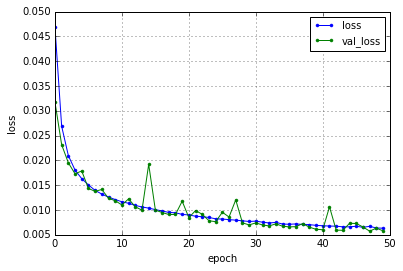

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.0405 - val_loss: 0.0280
Epoch 2/50
2s - loss: 0.0213 - val_loss: 0.0177
Epoch 3/50
2s - loss: 0.0155 - val_loss: 0.0134
Epoch 4/50
2s - loss: 0.0126 - val_loss: 0.0106
Epoch 5/50
2s - loss: 0.0107 - val_loss: 0.0096
Epoch 6/50
2s - loss: 0.0099 - val_loss: 0.0085
Epoch 7/50
2s - loss: 0.0090 - val_loss: 0.0082
Epoch 8/50
2s - loss: 0.0087 - val_loss: 0.0073
Epoch 9/50
2s - loss: 0.0084 - val_loss: 0.0073
Epoch 10/50
2s - loss: 0.0075 - val_loss: 0.0087
Epoch 11/50
2s - loss: 0.0081 - val_loss: 0.0070
Epoch 12/50
2s - loss: 0.0075 - val_loss: 0.0071
Epoch 13/50
2s - loss: 0.0073 - val_loss: 0.0111
Epoch 14/50
2s - loss: 0.0076 - val_loss: 0.0075
Epoch 15/50
2s - loss: 0.0077 - val_loss: 0.0066
Epoch 16/50
2s - loss: 0.0075 - val_loss: 0.0093
Epoch 17/50
2s - loss: 0.0073 - val_loss: 0.0101
Epoch 18/50
2s - loss: 0.0072 - val_loss: 0.0065
Epoch 19/50
2s - loss: 0.0071 - val_loss: 0.0096
Epoch 20/50


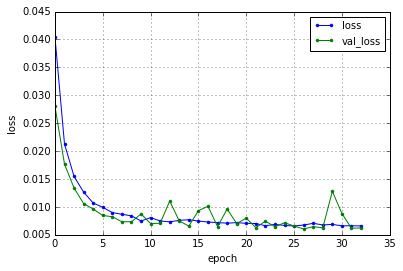

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
2s - loss: 0.0673 - val_loss: 0.0421
Epoch 2/50
2s - loss: 0.0329 - val_loss: 0.0273
Epoch 3/50
2s - loss: 0.0230 - val_loss: 0.0182
Epoch 4/50
2s - loss: 0.0171 - val_loss: 0.0145
Epoch 5/50
2s - loss: 0.0138 - val_loss: 0.0137
Epoch 6/50
2s - loss: 0.0111 - val_loss: 0.0157
Epoch 7/50
2s - loss: 0.0099 - val_loss: 0.0086
Epoch 8/50
2s - loss: 0.0090 - val_loss: 0.0081
Epoch 9/50
2s - loss: 0.0078 - val_loss: 0.0073
Epoch 10/50
2s - loss: 0.0073 - val_loss: 0.0065
Epoch 11/50
2s - loss: 0.0071 - val_loss: 0.0058
Epoch 12/50
2s - loss: 0.0069 - val_loss: 0.0059
Epoch 13/50
2s - loss: 0.0066 - val_loss: 0.0076
Epoch 14/50
2s - loss: 0.0069 - val_loss: 0.0051
Epoch 15/50
2s - loss: 0.0063 - val_loss: 0.0090
Epoch 16/50
2s - loss: 0.0059 - val_loss: 0.0050
Epoch 17/50
3s - loss: 0.0061 - val_loss: 0.0057
Epoch 18/50
2s - loss: 0.0060 - val_loss: 0.0049
Epoch 19/50
2s - loss: 0.0059 - val_loss: 0.0058
Epoch 20/50


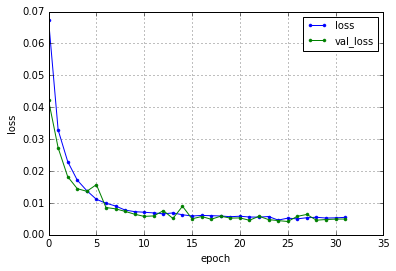

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0169 - val_loss: 0.0096
Epoch 2/50
2s - loss: 0.0080 - val_loss: 0.0066
Epoch 3/50
3s - loss: 0.0058 - val_loss: 0.0049
Epoch 4/50
3s - loss: 0.0049 - val_loss: 0.0042
Epoch 5/50
3s - loss: 0.0045 - val_loss: 0.0048
Epoch 6/50
3s - loss: 0.0042 - val_loss: 0.0036
Epoch 7/50
3s - loss: 0.0041 - val_loss: 0.0038
Epoch 8/50
3s - loss: 0.0039 - val_loss: 0.0035
Epoch 9/50
2s - loss: 0.0038 - val_loss: 0.0033
Epoch 10/50
3s - loss: 0.0037 - val_loss: 0.0035
Epoch 11/50
3s - loss: 0.0036 - val_loss: 0.0034
Epoch 12/50
3s - loss: 0.0035 - val_loss: 0.0032
Epoch 13/50
3s - loss: 0.0035 - val_loss: 0.0034
Epoch 14/50
3s - loss: 0.0039 - val_loss: 0.0045
Epoch 15/50
3s - loss: 0.0036 - val_loss: 0.0034
Epoch 16/50
3s - loss: 0.0035 - val_loss: 0.0038
Epoch 17/50
3s - loss: 0.0036 - val_loss: 0.0034
Epoch 18/50
3s - loss: 0.0034 - val_loss: 0.0029
Epoch 19/50
3s - loss: 0.0036 - val_loss: 0.0050
Epoch 20/50


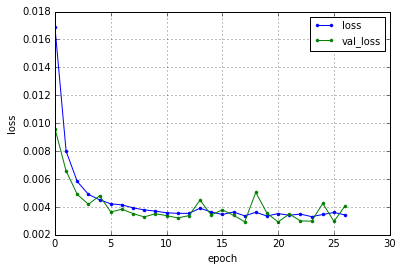

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
3s - loss: 0.0403 - val_loss: 0.0229
Epoch 2/50
4s - loss: 0.0200 - val_loss: 0.0150
Epoch 3/50
3s - loss: 0.0162 - val_loss: 0.0162
Epoch 4/50
4s - loss: 0.0137 - val_loss: 0.0128
Epoch 5/50
4s - loss: 0.0123 - val_loss: 0.0098
Epoch 6/50
4s - loss: 0.0112 - val_loss: 0.0103
Epoch 7/50
4s - loss: 0.0108 - val_loss: 0.0088
Epoch 8/50
3s - loss: 0.0103 - val_loss: 0.0088
Epoch 9/50
4s - loss: 0.0105 - val_loss: 0.0080
Epoch 10/50
4s - loss: 0.0095 - val_loss: 0.0087
Epoch 11/50
3s - loss: 0.0090 - val_loss: 0.0105
Epoch 12/50
4s - loss: 0.0099 - val_loss: 0.0077
Epoch 13/50
4s - loss: 0.0085 - val_loss: 0.0100
Epoch 14/50
4s - loss: 0.0094 - val_loss: 0.0134
Epoch 15/50
4s - loss: 0.0090 - val_loss: 0.0086
Epoch 16/50
4s - loss: 0.0084 - val_loss: 0.0072
Epoch 17/50
4s - loss: 0.0093 - val_loss: 0.0070
Epoch 18/50
4s - loss: 0.0084 - val_loss: 0.0151
Epoch 19/50
4s - loss: 0.0088 - val_loss: 0.0085
Epoch 20/50


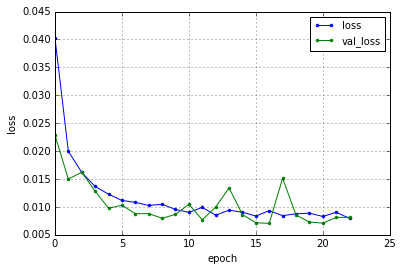

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
5s - loss: 0.0725 - val_loss: 0.0311
Epoch 2/50
4s - loss: 0.0321 - val_loss: 0.0335
Epoch 3/50
4s - loss: 0.0239 - val_loss: 0.0198
Epoch 4/50
4s - loss: 0.0212 - val_loss: 0.0180
Epoch 5/50
4s - loss: 0.0172 - val_loss: 0.0145
Epoch 6/50
4s - loss: 0.0156 - val_loss: 0.0145
Epoch 7/50
4s - loss: 0.0136 - val_loss: 0.0124
Epoch 8/50
4s - loss: 0.0124 - val_loss: 0.0103
Epoch 9/50
4s - loss: 0.0133 - val_loss: 0.0130
Epoch 10/50
4s - loss: 0.0134 - val_loss: 0.0114
Epoch 11/50
4s - loss: 0.0127 - val_loss: 0.0110
Epoch 12/50
4s - loss: 0.0137 - val_loss: 0.0118
Epoch 13/50
4s - loss: 0.0120 - val_loss: 0.0115
Epoch 14/50
4s - loss: 0.0105 - val_loss: 0.0209


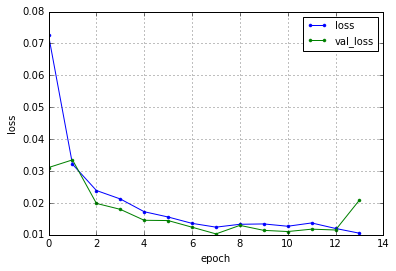

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0166 - val_loss: 0.0104
Epoch 2/50
4s - loss: 0.0076 - val_loss: 0.0062
Epoch 3/50
4s - loss: 0.0068 - val_loss: 0.0055
Epoch 4/50
4s - loss: 0.0061 - val_loss: 0.0095
Epoch 5/50
4s - loss: 0.0058 - val_loss: 0.0048
Epoch 6/50
4s - loss: 0.0057 - val_loss: 0.0062
Epoch 7/50
4s - loss: 0.0052 - val_loss: 0.0048
Epoch 8/50
4s - loss: 0.0053 - val_loss: 0.0052
Epoch 9/50
4s - loss: 0.0050 - val_loss: 0.0047
Epoch 10/50
4s - loss: 0.0048 - val_loss: 0.0041
Epoch 11/50
4s - loss: 0.0050 - val_loss: 0.0046
Epoch 12/50
4s - loss: 0.0050 - val_loss: 0.0036
Epoch 13/50
4s - loss: 0.0050 - val_loss: 0.0043
Epoch 14/50
4s - loss: 0.0054 - val_loss: 0.0053
Epoch 15/50
4s - loss: 0.0046 - val_loss: 0.0043
Epoch 16/50
4s - loss: 0.0049 - val_loss: 0.0040
Epoch 17/50
4s - loss: 0.0049 - val_loss: 0.0046
Epoch 18/50
4s - loss: 0.0050 - val_loss: 0.0040


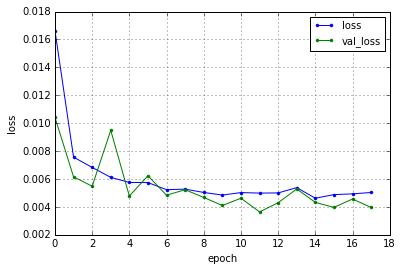

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0524 - val_loss: 0.0330
Epoch 2/50
5s - loss: 0.0306 - val_loss: 0.0261
Epoch 3/50
3s - loss: 0.0253 - val_loss: 0.0224
Epoch 4/50
4s - loss: 0.0221 - val_loss: 0.0192
Epoch 5/50
6s - loss: 0.0201 - val_loss: 0.0168
Epoch 6/50
6s - loss: 0.0180 - val_loss: 0.0189
Epoch 7/50
6s - loss: 0.0171 - val_loss: 0.0229
Epoch 8/50
6s - loss: 0.0164 - val_loss: 0.0141
Epoch 9/50
5s - loss: 0.0153 - val_loss: 0.0136
Epoch 10/50
6s - loss: 0.0148 - val_loss: 0.0146
Epoch 11/50
6s - loss: 0.0142 - val_loss: 0.0269
Epoch 12/50
6s - loss: 0.0138 - val_loss: 0.0129
Epoch 13/50
6s - loss: 0.0133 - val_loss: 0.0139
Epoch 14/50
6s - loss: 0.0130 - val_loss: 0.0123
Epoch 15/50
6s - loss: 0.0125 - val_loss: 0.0113
Epoch 16/50
6s - loss: 0.0121 - val_loss: 0.0119
Epoch 17/50
6s - loss: 0.0119 - val_loss: 0.0122
Epoch 18/50
6s - loss: 0.0113 - val_loss: 0.0106
Epoch 19/50
6s - loss: 0.0113 - val_loss: 0.0100
Epoch 20/50


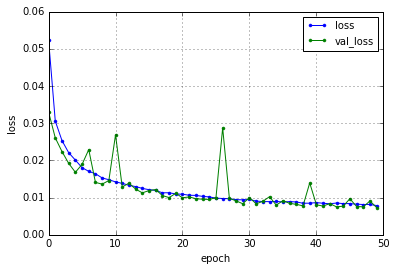

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
6s - loss: 0.0926 - val_loss: 0.0602
Epoch 2/50
6s - loss: 0.0551 - val_loss: 0.0456
Epoch 3/50
6s - loss: 0.0447 - val_loss: 0.0368
Epoch 4/50
6s - loss: 0.0381 - val_loss: 0.0319
Epoch 5/50
6s - loss: 0.0336 - val_loss: 0.0290
Epoch 6/50
6s - loss: 0.0310 - val_loss: 0.0275
Epoch 7/50
6s - loss: 0.0291 - val_loss: 0.0260
Epoch 8/50
6s - loss: 0.0275 - val_loss: 0.0290
Epoch 9/50
6s - loss: 0.0262 - val_loss: 0.0290
Epoch 10/50
6s - loss: 0.0252 - val_loss: 0.0251
Epoch 11/50
6s - loss: 0.0241 - val_loss: 0.0214
Epoch 12/50
6s - loss: 0.0231 - val_loss: 0.0227
Epoch 13/50
6s - loss: 0.0217 - val_loss: 0.0203
Epoch 14/50
6s - loss: 0.0209 - val_loss: 0.0246
Epoch 15/50
6s - loss: 0.0203 - val_loss: 0.0175
Epoch 16/50
6s - loss: 0.0194 - val_loss: 0.0187
Epoch 17/50
6s - loss: 0.0187 - val_loss: 0.0176
Epoch 18/50
6s - loss: 0.0179 - val_loss: 0.0176
Epoch 19/50
6s - loss: 0.0171 - val_loss: 0.0151
Epoch 20/50


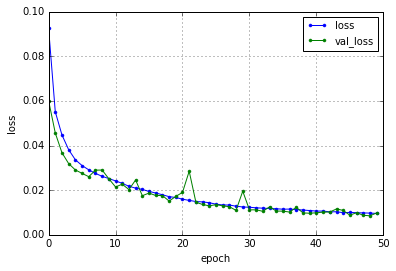

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
6s - loss: 0.0212 - val_loss: 0.0120
Epoch 2/50
6s - loss: 0.0112 - val_loss: 0.0086
Epoch 3/50
6s - loss: 0.0089 - val_loss: 0.0206
Epoch 4/50
5s - loss: 0.0078 - val_loss: 0.0091
Epoch 5/50
4s - loss: 0.0068 - val_loss: 0.0065
Epoch 6/50
4s - loss: 0.0062 - val_loss: 0.0091
Epoch 7/50
4s - loss: 0.0058 - val_loss: 0.0054
Epoch 8/50
4s - loss: 0.0056 - val_loss: 0.0051
Epoch 9/50
5s - loss: 0.0054 - val_loss: 0.0047
Epoch 10/50
5s - loss: 0.0050 - val_loss: 0.0077
Epoch 11/50
4s - loss: 0.0049 - val_loss: 0.0054
Epoch 12/50
4s - loss: 0.0048 - val_loss: 0.0052
Epoch 13/50
4s - loss: 0.0047 - val_loss: 0.0047
Epoch 14/50
4s - loss: 0.0044 - val_loss: 0.0052
Epoch 15/50
4s - loss: 0.0044 - val_loss: 0.0042
Epoch 16/50
4s - loss: 0.0043 - val_loss: 0.0046
Epoch 17/50
4s - loss: 0.0041 - val_loss: 0.0060
Epoch 18/50
4s - loss: 0.0042 - val_loss: 0.0038
Epoch 19/50
4s - loss: 0.0040 - val_loss: 0.0037
Epoch 20/50


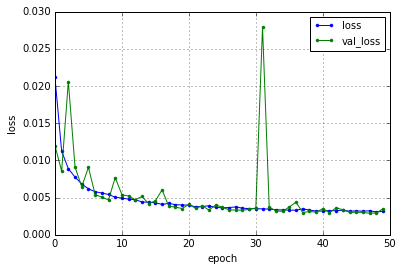

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
5s - loss: 0.0559 - val_loss: 0.0381
Epoch 2/50
4s - loss: 0.0394 - val_loss: 0.0324
Epoch 3/50
5s - loss: 0.0353 - val_loss: 0.0267
Epoch 4/50
4s - loss: 0.0326 - val_loss: 0.0335
Epoch 5/50
4s - loss: 0.0307 - val_loss: 0.0273
Epoch 6/50
4s - loss: 0.0295 - val_loss: 0.0367
Epoch 7/50
4s - loss: 0.0280 - val_loss: 0.0224
Epoch 8/50
4s - loss: 0.0274 - val_loss: 0.0214
Epoch 9/50
4s - loss: 0.0264 - val_loss: 0.0215
Epoch 10/50
5s - loss: 0.0257 - val_loss: 0.0524
Epoch 11/50
4s - loss: 0.0253 - val_loss: 0.0240
Epoch 12/50
4s - loss: 0.0246 - val_loss: 0.0232
Epoch 13/50
5s - loss: 0.0241 - val_loss: 0.0178
Epoch 14/50
4s - loss: 0.0235 - val_loss: 0.0299
Epoch 15/50
4s - loss: 0.0227 - val_loss: 0.0397
Epoch 16/50
4s - loss: 0.0224 - val_loss: 0.0260
Epoch 17/50
3s - loss: 0.0220 - val_loss: 0.0194
Epoch 18/50
4s - loss: 0.0217 - val_loss: 0.0516
Epoch 19/50
4s - loss: 0.0212 - val_loss: 0.0187


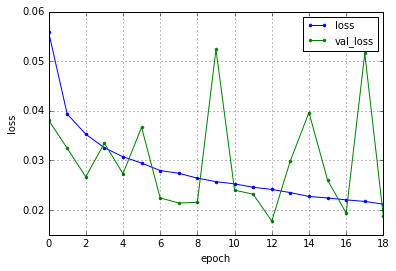

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0906 - val_loss: 0.1393
Epoch 2/50
4s - loss: 0.0593 - val_loss: 0.0459
Epoch 3/50
4s - loss: 0.0510 - val_loss: 0.0445
Epoch 4/50
4s - loss: 0.0468 - val_loss: 0.0453
Epoch 5/50
4s - loss: 0.0438 - val_loss: 0.0349
Epoch 6/50
4s - loss: 0.0413 - val_loss: 0.0362
Epoch 7/50
5s - loss: 0.0388 - val_loss: 0.0340
Epoch 8/50
4s - loss: 0.0370 - val_loss: 0.0410
Epoch 9/50
4s - loss: 0.0358 - val_loss: 0.0295
Epoch 10/50
4s - loss: 0.0343 - val_loss: 0.0651
Epoch 11/50
4s - loss: 0.0332 - val_loss: 0.0332
Epoch 12/50
4s - loss: 0.0326 - val_loss: 0.0252
Epoch 13/50
4s - loss: 0.0316 - val_loss: 0.0298
Epoch 14/50
5s - loss: 0.0310 - val_loss: 0.0356
Epoch 15/50
4s - loss: 0.0305 - val_loss: 0.0374
Epoch 16/50
4s - loss: 0.0300 - val_loss: 0.0467
Epoch 17/50
4s - loss: 0.0294 - val_loss: 0.0327
Epoch 18/50
4s - loss: 0.0290 - val_loss: 0.0292


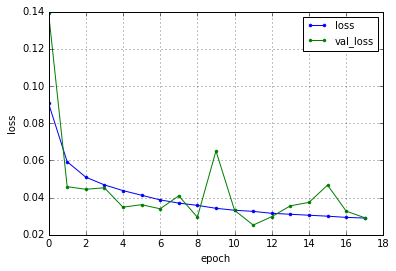

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.0203 - val_loss: 0.0115
Epoch 2/50
5s - loss: 0.0145 - val_loss: 0.0295
Epoch 3/50
4s - loss: 0.0136 - val_loss: 0.0189
Epoch 4/50
4s - loss: 0.0132 - val_loss: 0.0110
Epoch 5/50
4s - loss: 0.0128 - val_loss: 0.0203
Epoch 6/50
4s - loss: 0.0127 - val_loss: 0.0098
Epoch 7/50
4s - loss: 0.0126 - val_loss: 0.0079
Epoch 8/50
4s - loss: 0.0124 - val_loss: 0.0082
Epoch 9/50
4s - loss: 0.0124 - val_loss: 0.0410
Epoch 10/50
5s - loss: 0.0119 - val_loss: 0.0186
Epoch 11/50
4s - loss: 0.0117 - val_loss: 0.0076
Epoch 12/50
4s - loss: 0.0116 - val_loss: 0.0140
Epoch 13/50
4s - loss: 0.0106 - val_loss: 0.0089
Epoch 14/50
5s - loss: 0.0102 - val_loss: 0.0110
Epoch 15/50
4s - loss: 0.0100 - val_loss: 0.0120
Epoch 16/50
4s - loss: 0.0097 - val_loss: 0.0090
Epoch 17/50
4s - loss: 0.0095 - val_loss: 0.0077


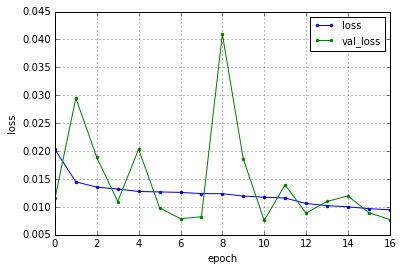

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
5s - loss: 0.0691 - val_loss: 0.0543
Epoch 2/50
4s - loss: 0.0503 - val_loss: 0.0423
Epoch 3/50
4s - loss: 0.0490 - val_loss: 0.0392
Epoch 4/50
4s - loss: 0.0402 - val_loss: 0.0358
Epoch 5/50
4s - loss: 0.0421 - val_loss: 0.0337
Epoch 6/50
4s - loss: 0.0374 - val_loss: 0.0327
Epoch 7/50
4s - loss: 0.0289 - val_loss: 0.0356
Epoch 8/50
5s - loss: 0.0414 - val_loss: 0.0584
Epoch 9/50
4s - loss: 0.0385 - val_loss: 0.0281
Epoch 10/50
4s - loss: 0.0262 - val_loss: 0.0220
Epoch 11/50
4s - loss: 0.0359 - val_loss: 0.0549
Epoch 12/50
4s - loss: 0.0323 - val_loss: 0.0262
Epoch 13/50
5s - loss: 0.0341 - val_loss: 0.0273
Epoch 14/50
4s - loss: 0.0262 - val_loss: 0.0224
Epoch 15/50
5s - loss: 0.0230 - val_loss: 0.0214
Epoch 16/50
5s - loss: 0.0234 - val_loss: 0.0366
Epoch 17/50
4s - loss: 0.0212 - val_loss: 0.0217
Epoch 18/50
4s - loss: 0.0202 - val_loss: 0.0207
Epoch 19/50
5s - loss: 0.0192 - val_loss: 0.0197
Epoch 20/50


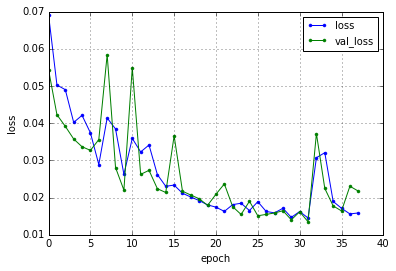

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
4s - loss: 0.1091 - val_loss: 0.0847
Epoch 2/50
4s - loss: 0.0813 - val_loss: 0.0754
Epoch 3/50
4s - loss: 0.0698 - val_loss: 0.0725
Epoch 4/50
4s - loss: 0.0579 - val_loss: 0.0527
Epoch 5/50
5s - loss: 0.0536 - val_loss: 0.0503
Epoch 6/50
5s - loss: 0.0501 - val_loss: 0.0546
Epoch 7/50
4s - loss: 0.0462 - val_loss: 0.0495
Epoch 8/50
4s - loss: 0.0469 - val_loss: 0.0408
Epoch 9/50
4s - loss: 0.0468 - val_loss: 0.0358
Epoch 10/50
5s - loss: 0.0492 - val_loss: 0.0526
Epoch 11/50
4s - loss: 0.0498 - val_loss: 0.0494
Epoch 12/50
4s - loss: 0.0463 - val_loss: 0.0561
Epoch 13/50
4s - loss: 0.0512 - val_loss: 0.0466
Epoch 14/50
4s - loss: 0.0591 - val_loss: 0.0611
Epoch 15/50
4s - loss: 0.0516 - val_loss: 0.0452


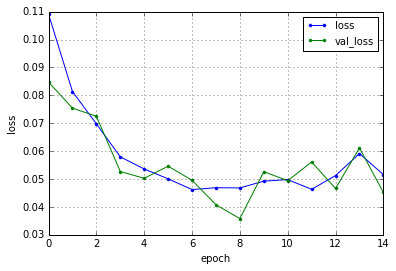

hiden node = 32
Train on 15794 samples, validate on 15794 samples
Epoch 1/50
5s - loss: 0.0247 - val_loss: 0.0193
Epoch 2/50
4s - loss: 0.0204 - val_loss: 0.0185
Epoch 3/50
4s - loss: 0.0192 - val_loss: 0.0166
Epoch 4/50
4s - loss: 0.0165 - val_loss: 0.0165
Epoch 5/50
4s - loss: 0.0156 - val_loss: 0.0124
Epoch 6/50
4s - loss: 0.0144 - val_loss: 0.0138
Epoch 7/50
4s - loss: 0.0129 - val_loss: 0.0154
Epoch 8/50
4s - loss: 0.0132 - val_loss: 0.0119
Epoch 9/50
4s - loss: 0.0105 - val_loss: 0.0101
Epoch 10/50
5s - loss: 0.0087 - val_loss: 0.0067
Epoch 11/50
5s - loss: 0.0079 - val_loss: 0.0064
Epoch 12/50
4s - loss: 0.0092 - val_loss: 0.0066
Epoch 13/50
5s - loss: 0.0076 - val_loss: 0.0058
Epoch 14/50
5s - loss: 0.0076 - val_loss: 0.0060
Epoch 15/50
4s - loss: 0.0070 - val_loss: 0.0085
Epoch 16/50
4s - loss: 0.0071 - val_loss: 0.0068
Epoch 17/50
5s - loss: 0.0081 - val_loss: 0.0110
Epoch 18/50
4s - loss: 0.0075 - val_loss: 0.0063
Epoch 19/50
4s - loss: 0.0065 - val_loss: 0.0076


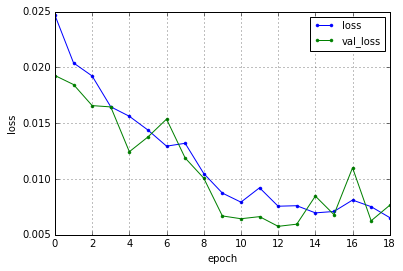

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15666
SourceData's aborting data = 6
window shape is (15666, 4096, 3)
(15666, 4096, 3)
hiden node = 32


OSError: [Errno 12] Cannot allocate memory

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    ArrayAxis = Axis.split(",")
    w=window.Window()
    for a in ArrayAxis:
        w.SetData(a,dic[a])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    print wind.shape
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

    # define SaveFileName
    for opt,optName in zip(optimizers,optimArray):
        for AxisName,WindowNum in zip(ArrayAxis,range(3)):
            print "hiden node = "+str(encoding_dim)
            CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName+'-'+AxisName
            SaveFileNameEncord=DataName+'_encoded'+CommonName
            SaveFileNameDecord=DataName+'_decoded'+CommonName
            SaveFileNameNet=DataName+'_net'+CommonName
            SaveFileNameTrain=DataName+'_train'+CommonName
            SaveFileNameTest=DataName+'_test'+CommonName
            SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

            window_test=wind[:,:,WindowNum]
            window_train=wind[:,:,WindowNum]
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
            shapeNum=wind.shape[1]


            # this is our input placeholder
            input_img = Input(shape=(shapeNum,))
            # "encoded" is the encoded representation of the input
            encoded = Dense(encoding_dim, activation='tanh',)(input_img)
            # "decoded" is the lossy reconstruction of the input
            decoded = Dense(shapeNum, activation='linear')(encoded)

            # this model maps an input to its reconstruction
            autoencoder = Model(input=input_img, output=decoded)

            # this model maps an input to its encoded representation
            encoder = Model(input=input_img, output=encoded)

            # create a placeholder for an encoded (32-dimensional) input
            encoded_input = Input(shape=(encoding_dim,))
            # retrieve the last layer of the autoencoder model
            decoder_layer = autoencoder.layers[-1]
            # create the decoder model
            decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

            #autoencoder.compile(optimizer='adam', loss='mse')
            autoencoder.compile(optimizer=opt(), loss='mse')
            plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

            early_stopping = EarlyStopping(monitor='val_loss', patience=5)
            hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
            time.sleep(0.1)
            encoded_imgs = encoder.predict(window_test)
            decoded_imgs = decoder.predict(encoded_imgs)

            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

            # save model and wights
            json_string = encoder.to_json()
            open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
            encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

            json_string = decoder.to_json()
            open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
            decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

            json_string = autoencoder.to_json()
            open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
            autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

            # plot loss
            loss = hist.history['loss']
            val_loss = hist.history['val_loss']

            nb_epoch = len(loss)
            plt.plot(range(nb_epoch), loss, marker='.', label='loss')
            plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
            plt.legend(loc='best', fontsize=10)
            plt.grid()
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.savefig(SaveFileNameGlaph)
            plt.show()

In [ ]:
print window_test.shape